In [22]:
import os
import glob2
import random
from random import randint
from IPython.core.display import Image, display
import numpy as np
from skimage import transform,io
import cv2
import IPython
from faced import FaceDetector
from faced.utils import annotate_image
from IPython.display import display, Image
from datetime import datetime

In [3]:
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [4]:
def rotate_image_90(image): 
    image = cv2.transpose(image)
    image   = cv2.flip(image,flipCode=1)

    return image 

In [21]:
training_path = "/whhdata/person/MH_WHH_0035/measurements/1537342371195/rgb/"
glob_search_path = os.path.join(training_path, "**/*.jpg")
jpg_paths = glob2.glob(glob_search_path)
print("jpg_paths", len(jpg_paths))

jpg_paths 94


File 67: /whhdata/person/MH_WHH_0035/measurements/1537342371195/rgb/rgb_MH_WHH_0035_1537342371195_110_90654.268783759.jpg


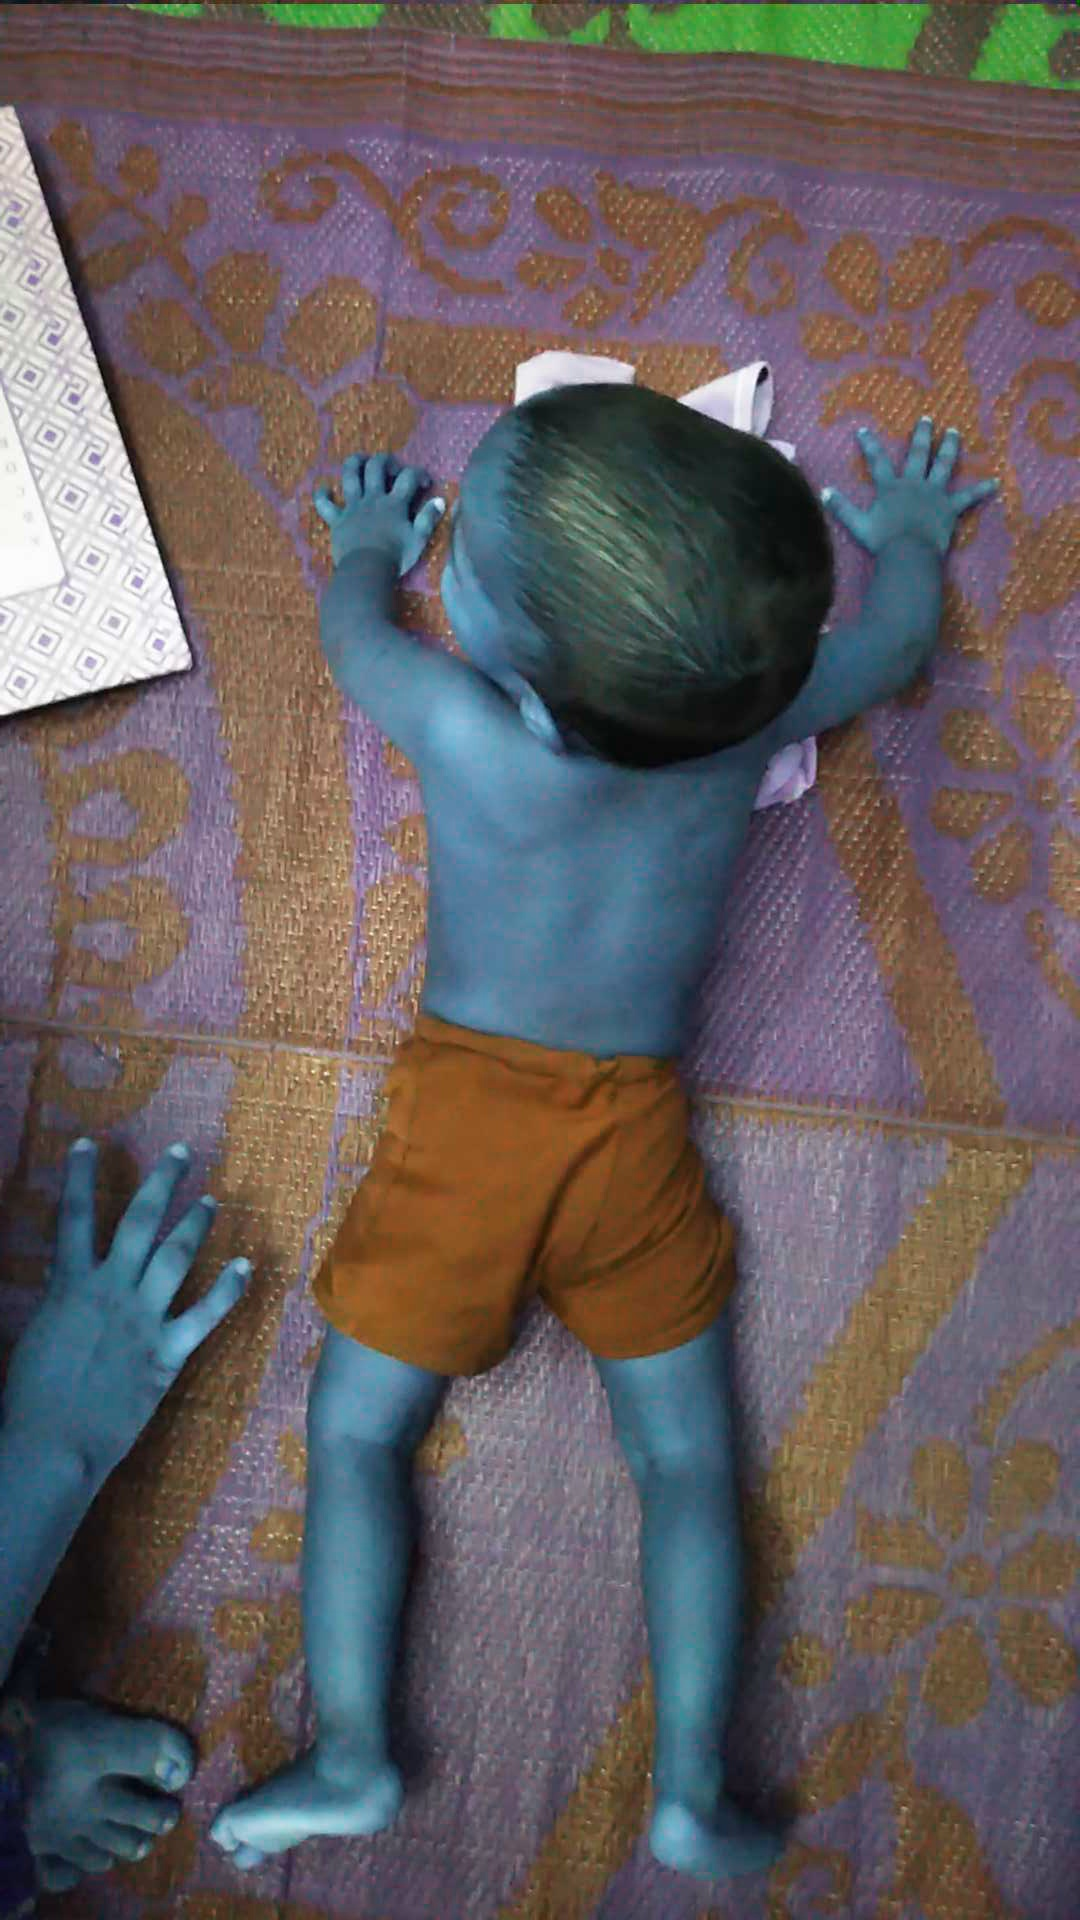

In [6]:
index = randint(0,len(jpg_paths)-1)
img_filename = jpg_paths[index]
image = io.imread(img_filename)
image = rotate_image_90(image)
print("File %s: %s" % (index, img_filename))
imshow(image)

In [7]:
def blur_face(img_path):
    rgb_img = rotate_image_90(io.imread(img_path))
    face_detector = FaceDetector()
    result_image = rgb_img.copy()
    bboxes = face_detector.predict(rgb_img)
    no_of_faces = len(bboxes)
    faces = bboxes
    blurred = False
    if bboxes !=[]:
        x,y,w,h,confd = bboxes[0]
        # Use this utils function to annotate the image.
        #ann_img = annotate_image(rgb_img, bboxes)
        #imshow(ann_img)
        sub_face = rgb_img[y-h//2:y+h//2, x-w//2:x+w//2]
        # apply a gaussian blur on this new recangle image
        if(confd > 0.5):
            sub_face = cv2.GaussianBlur(sub_face,(23, 23), 40)
            sub_face = cv2.GaussianBlur(sub_face,(23, 23), 40)
            sub_face = cv2.GaussianBlur(sub_face,(23, 23), 40)
            blurred = True
        # merge this blurry rectangle to our final image
        result_image[y-h//2:y+h//2, x-w//2:x+w//2] = sub_face
        #print(confd,blurred)
        #imshow(result_image)
    return result_image,blurred,img_path,no_of_faces

range(0, 93)


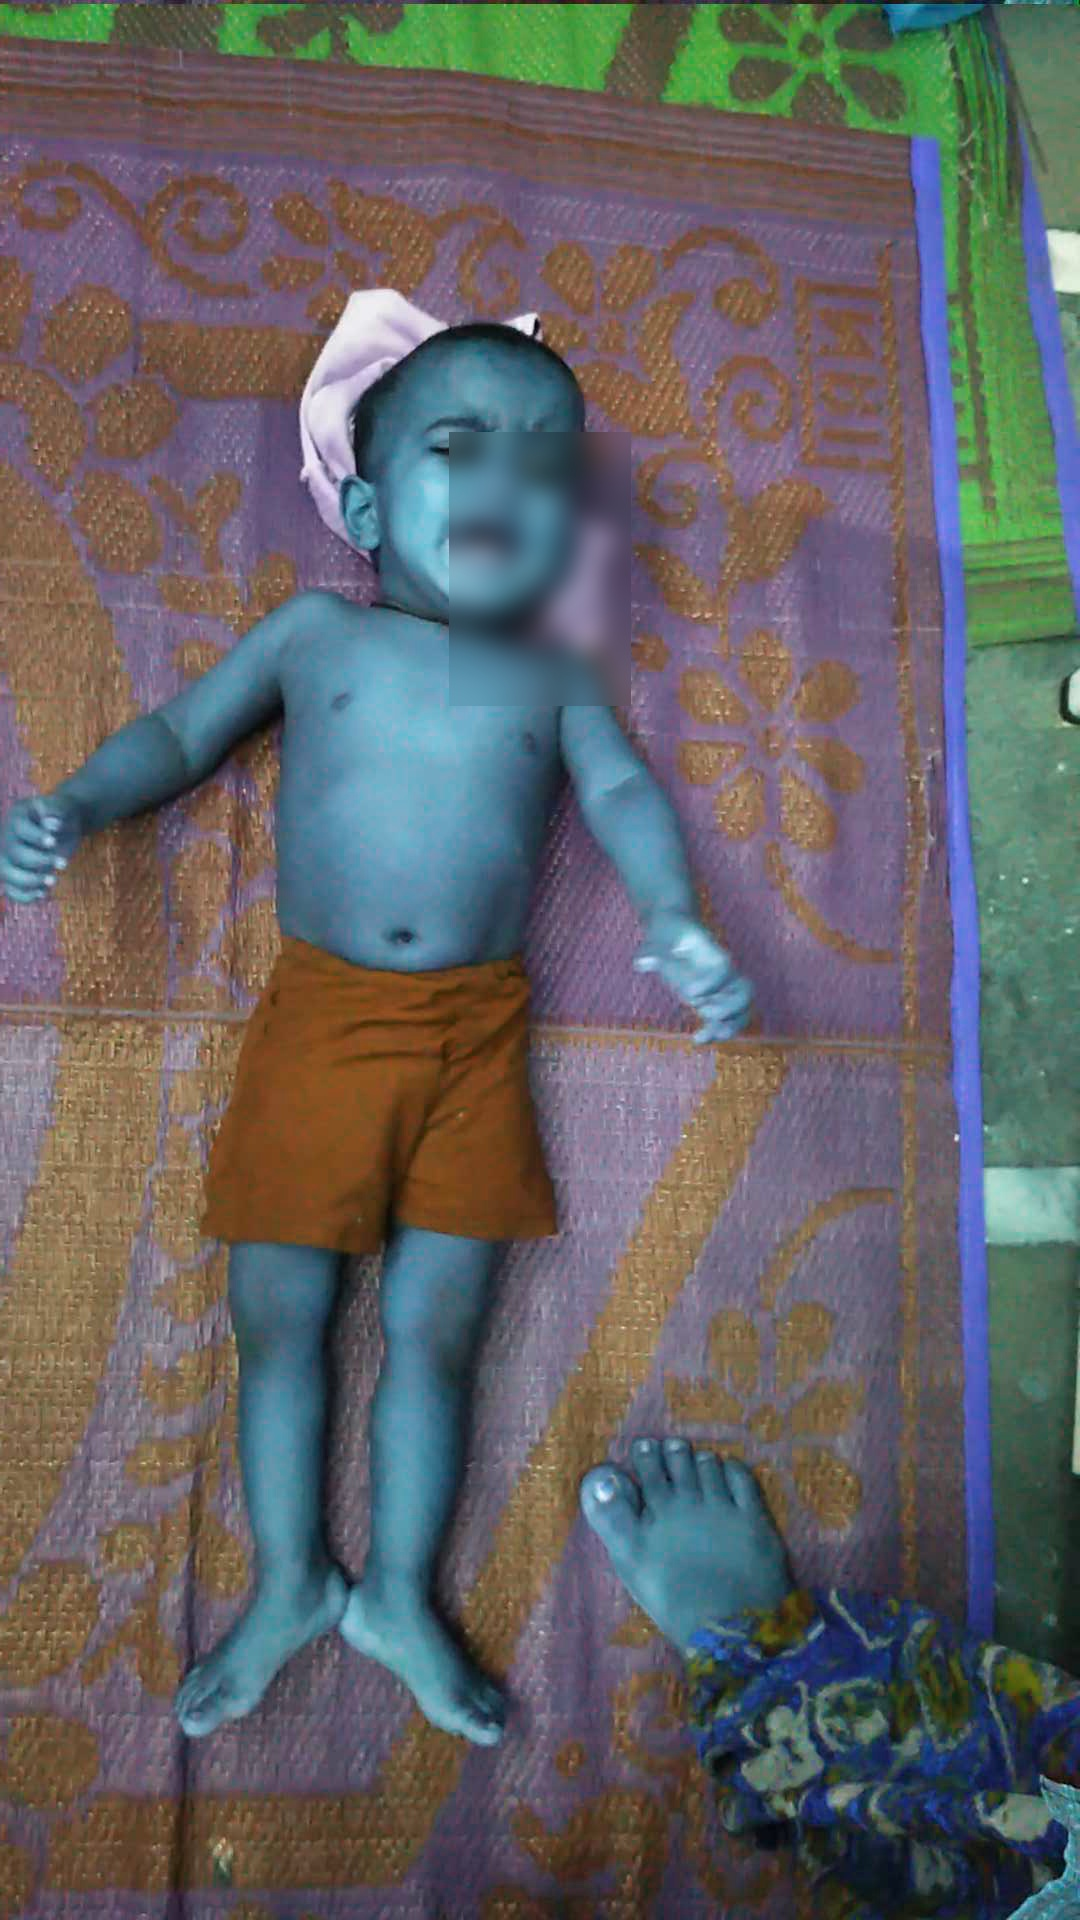

True


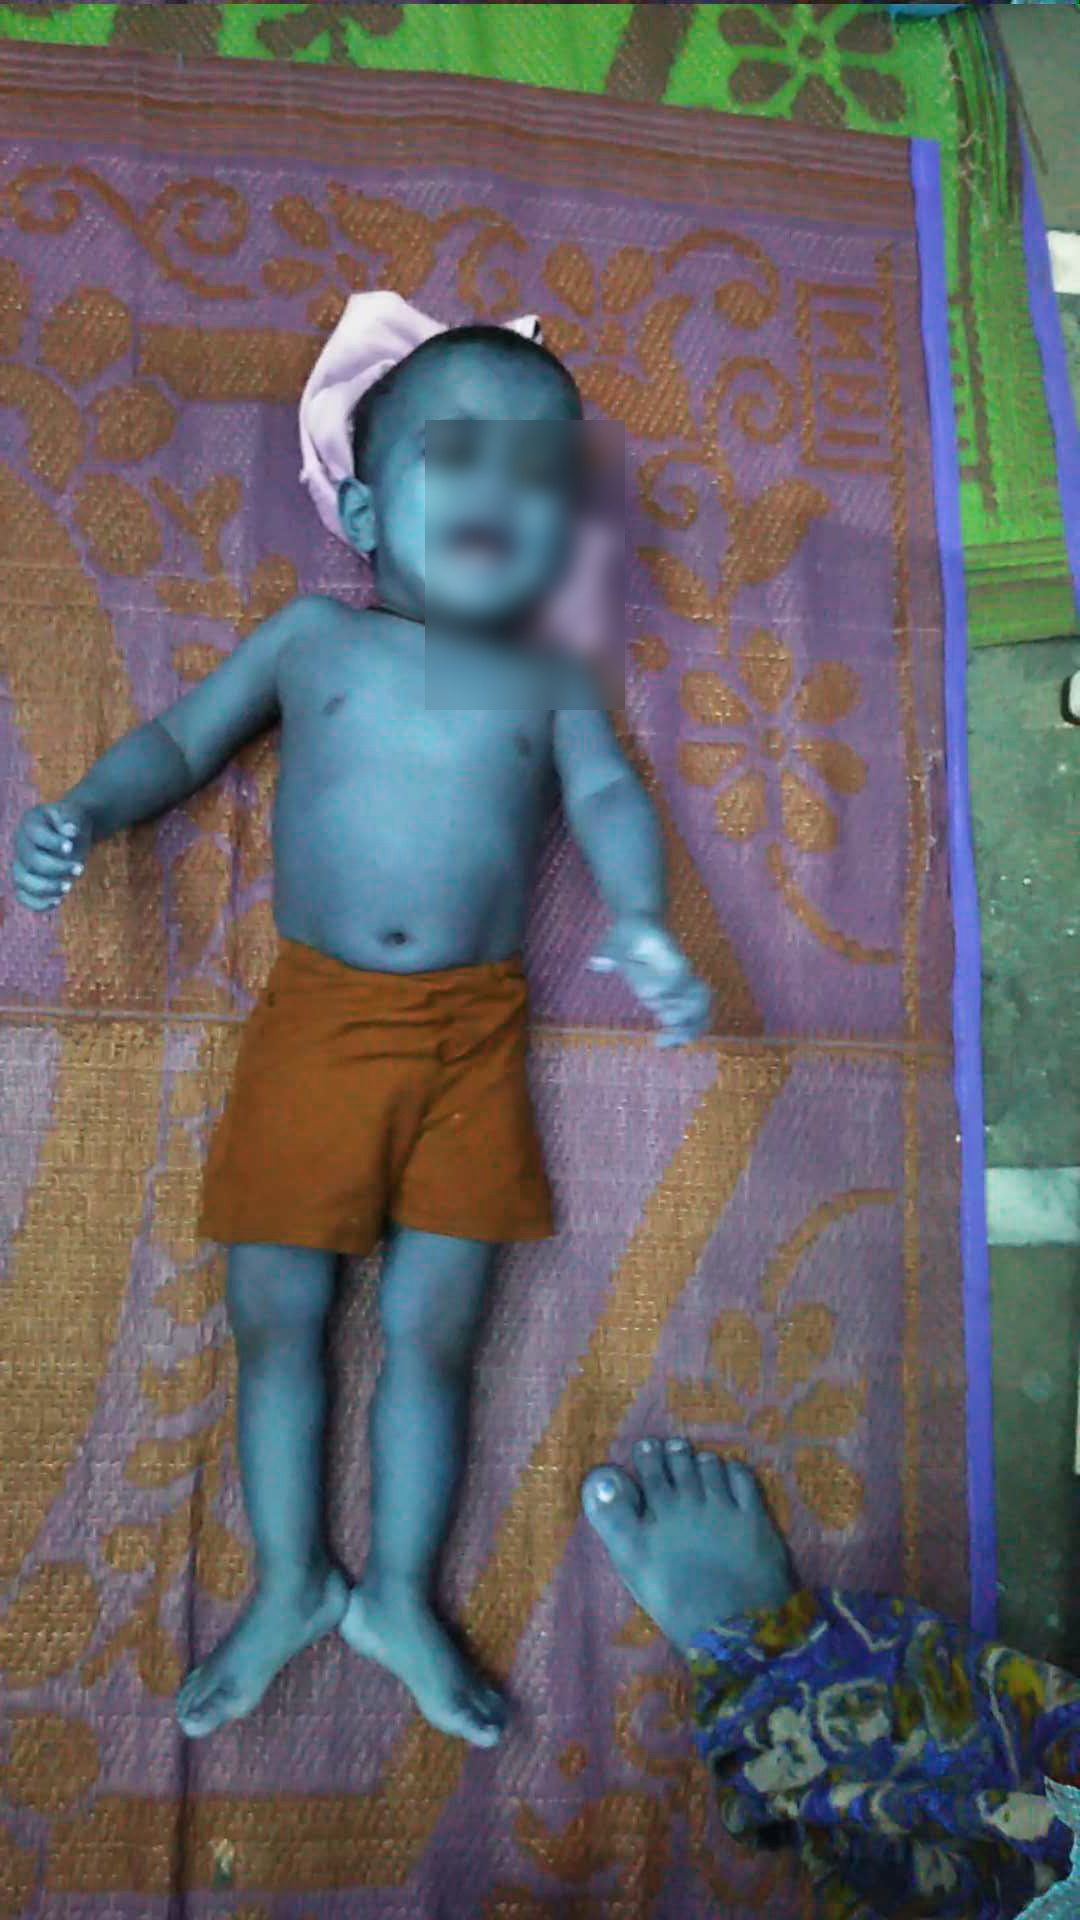

True


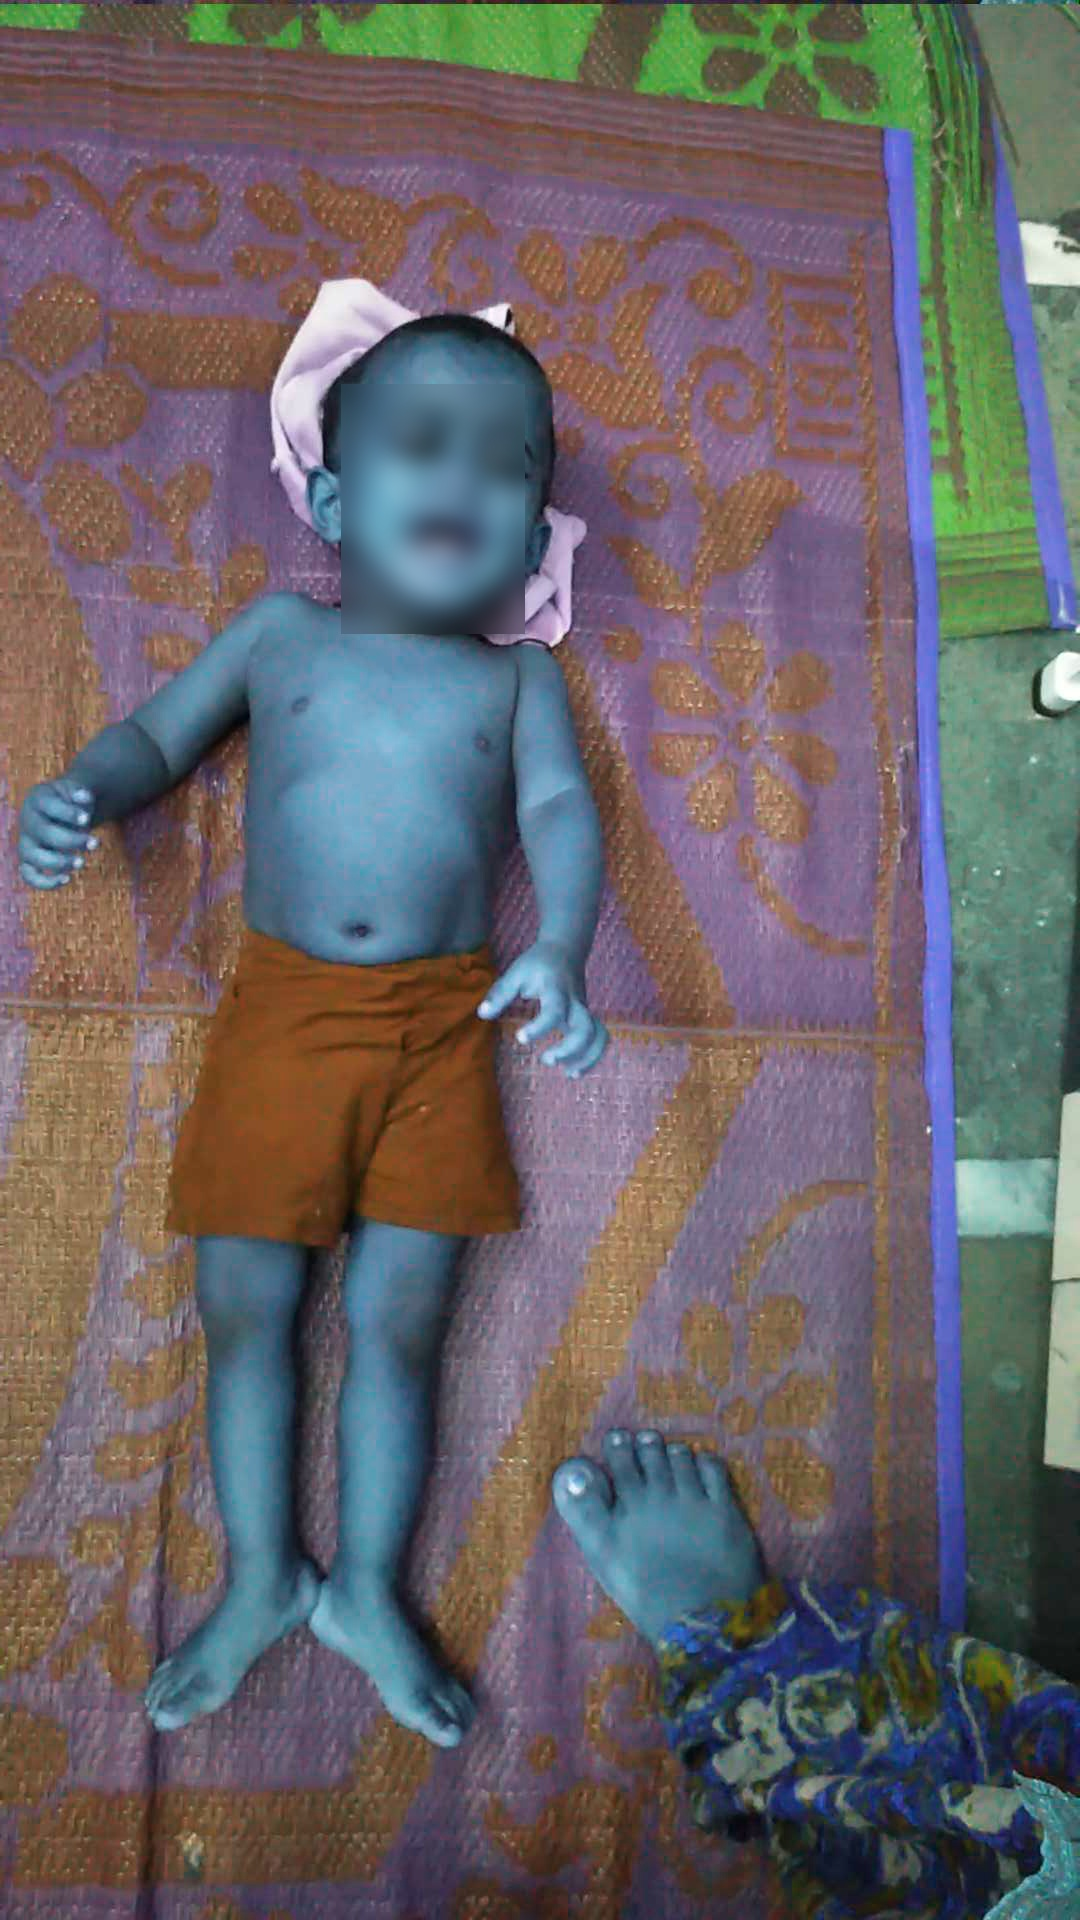

True


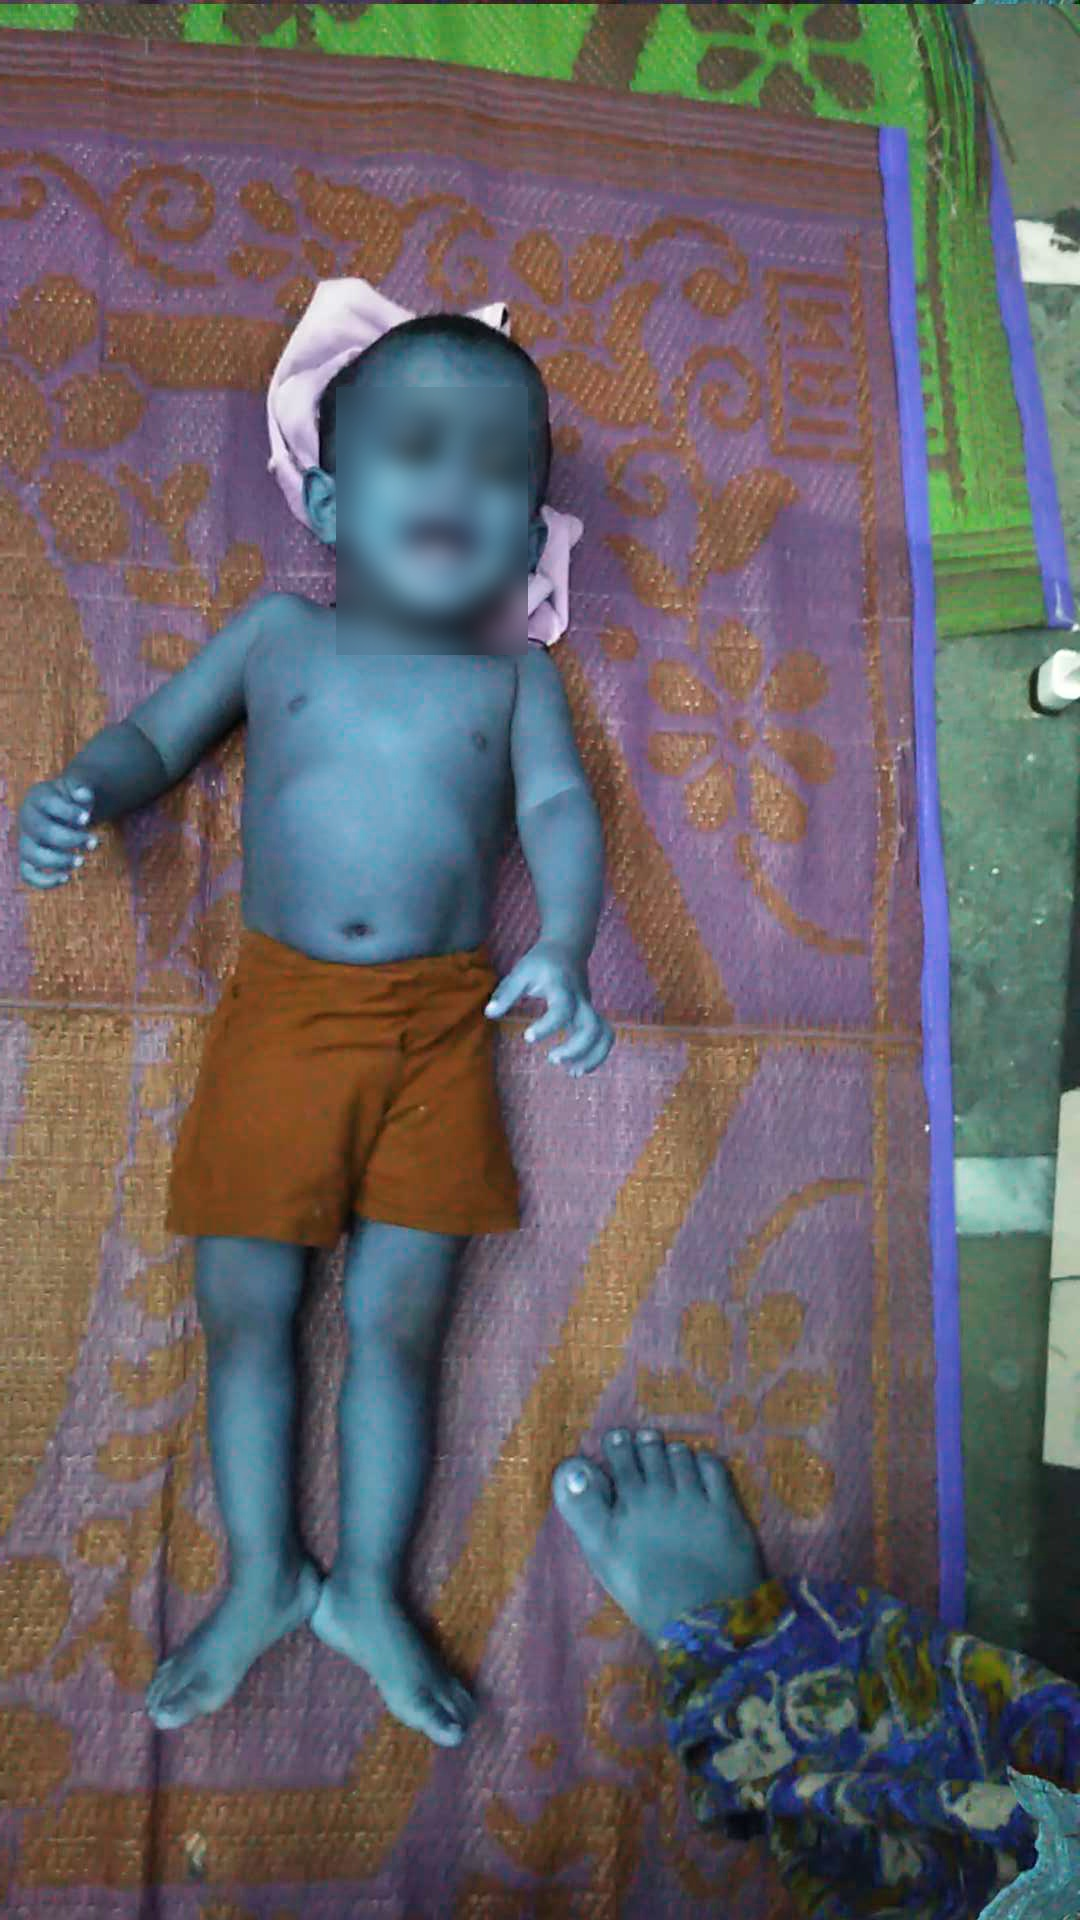

True


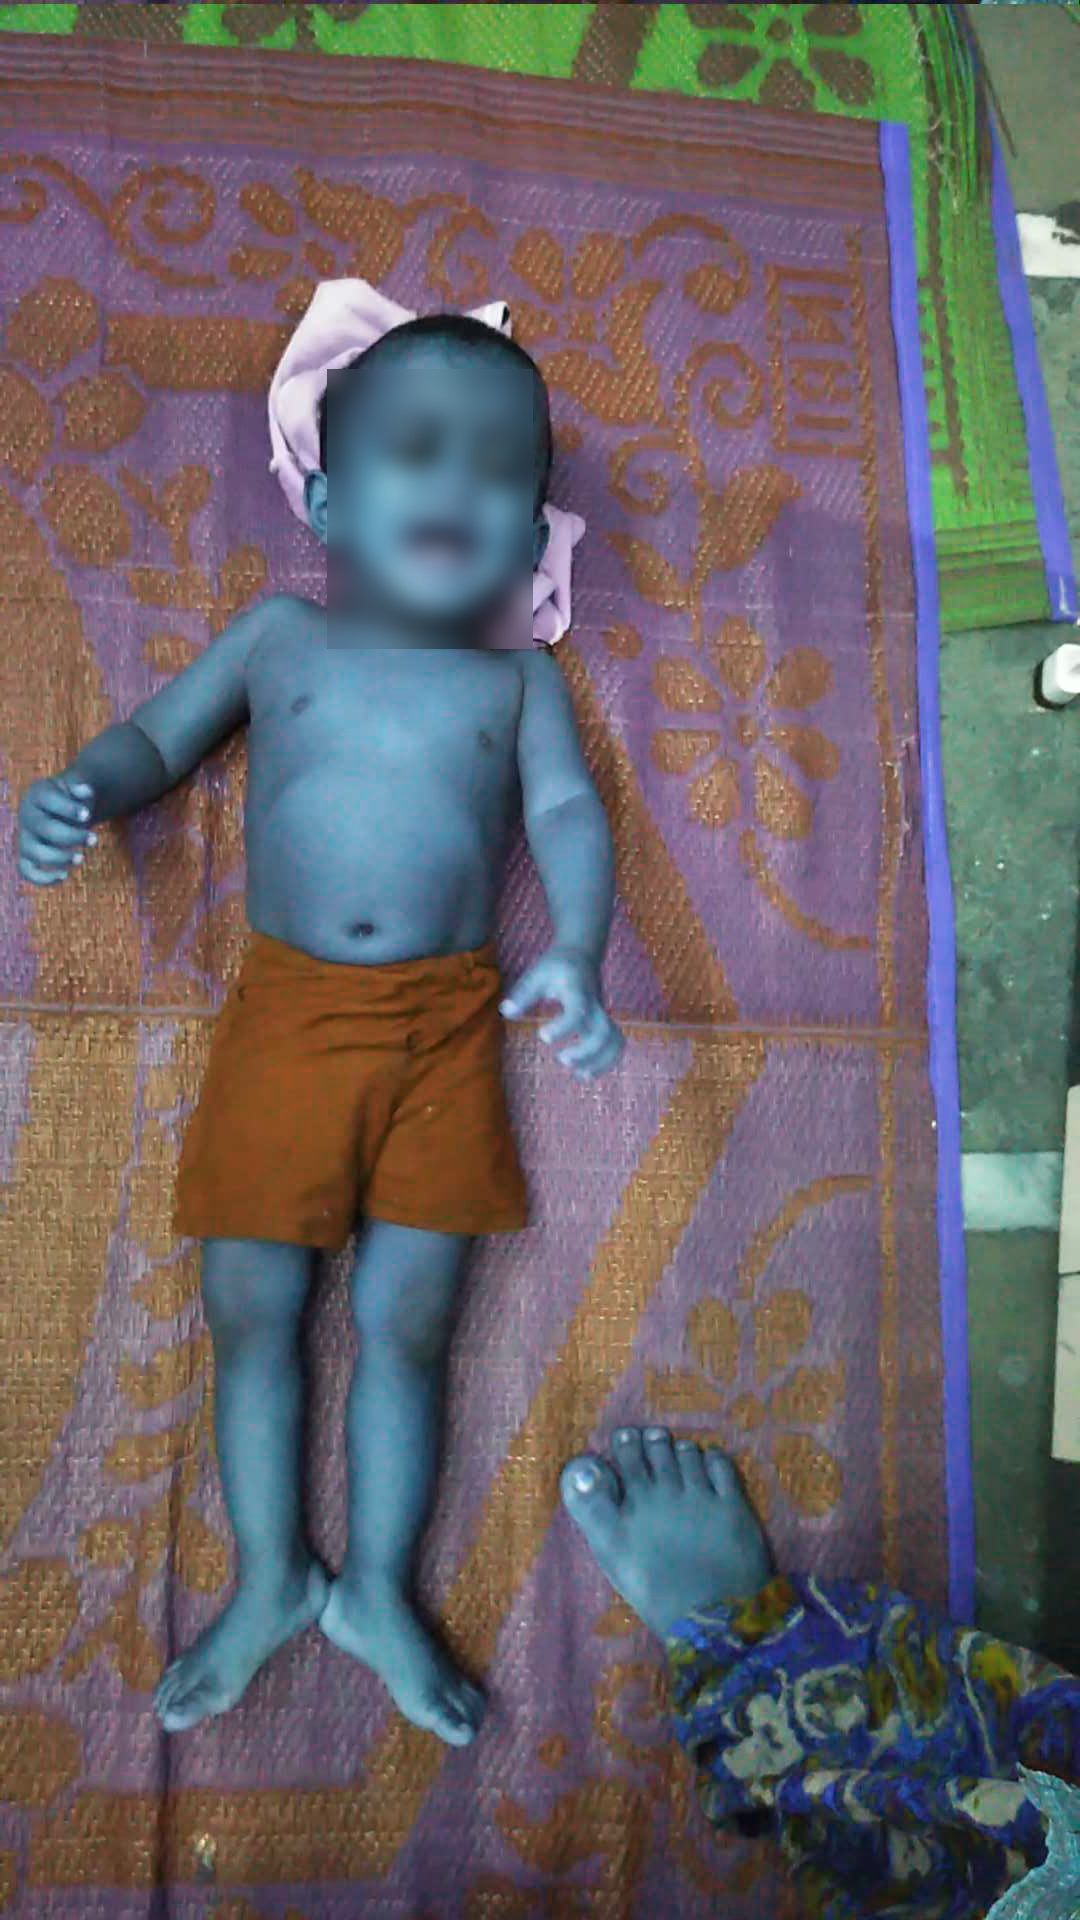

True


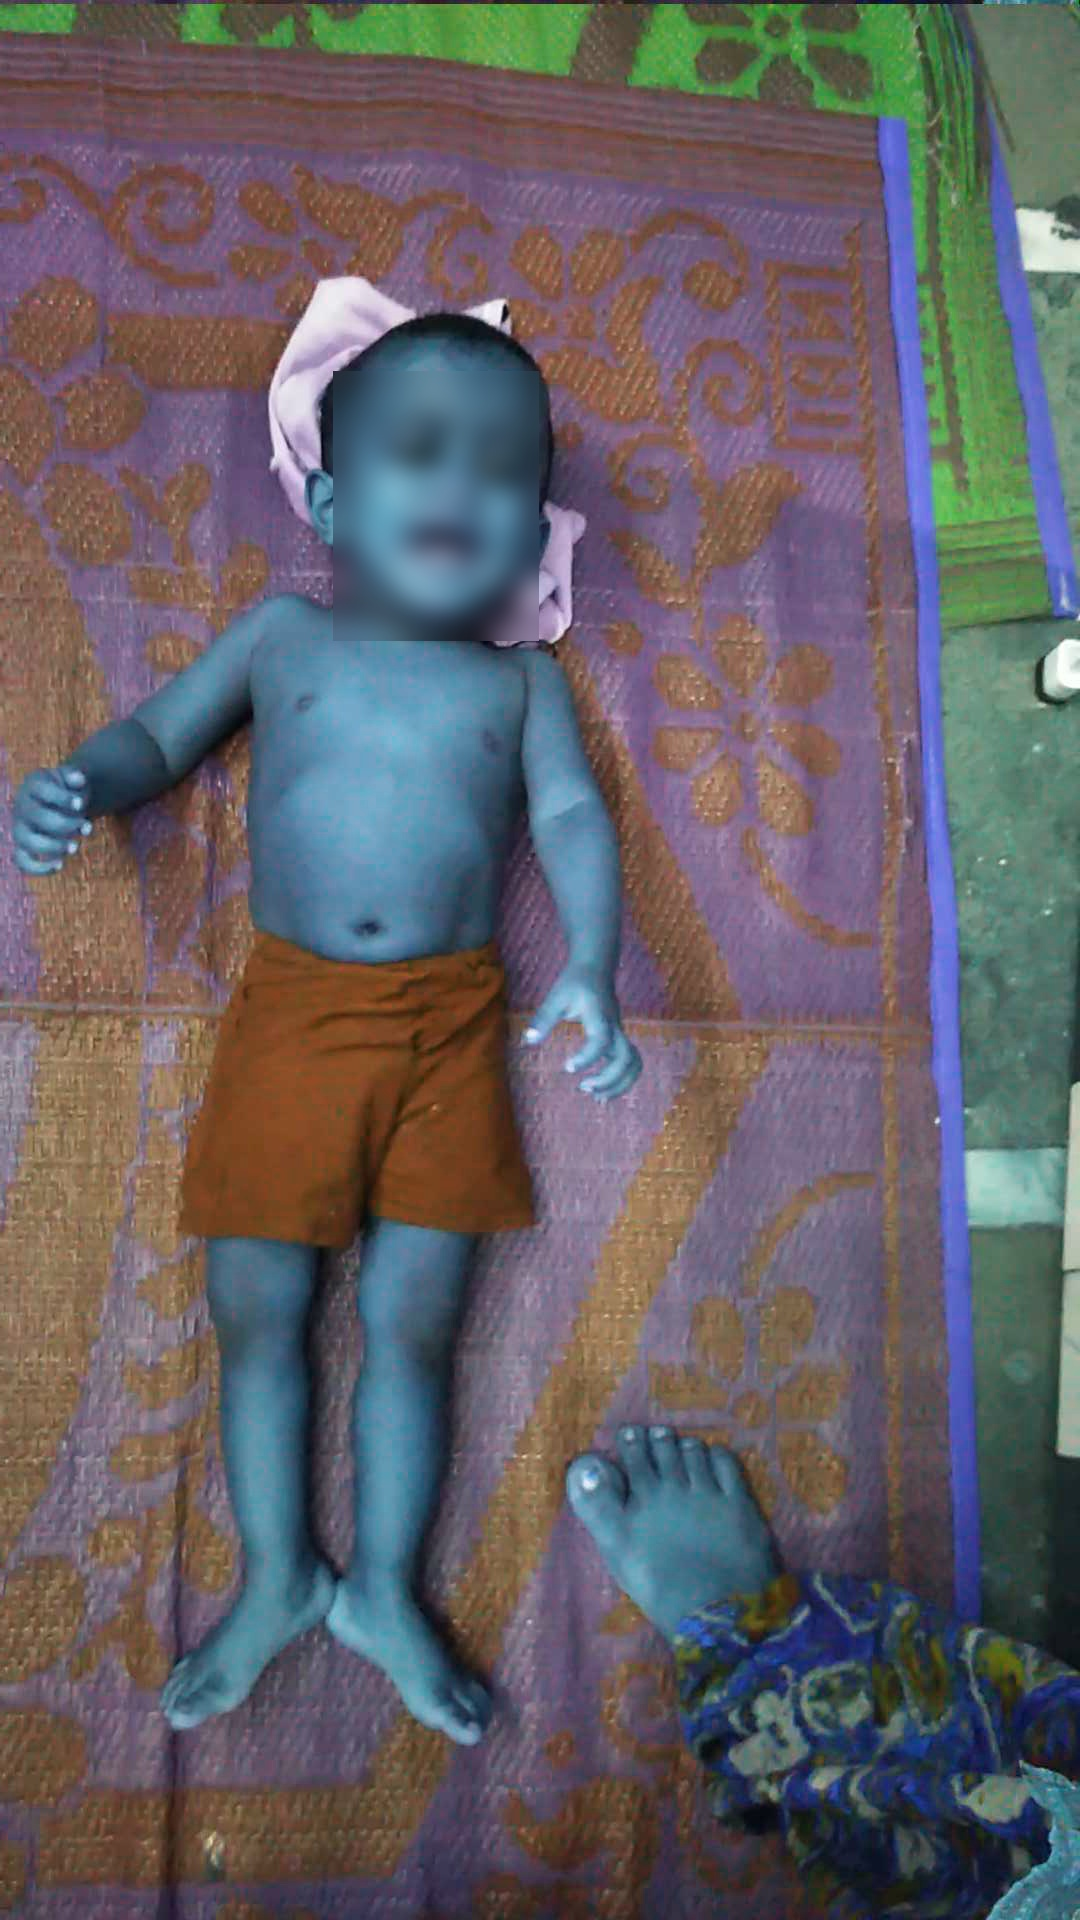

True


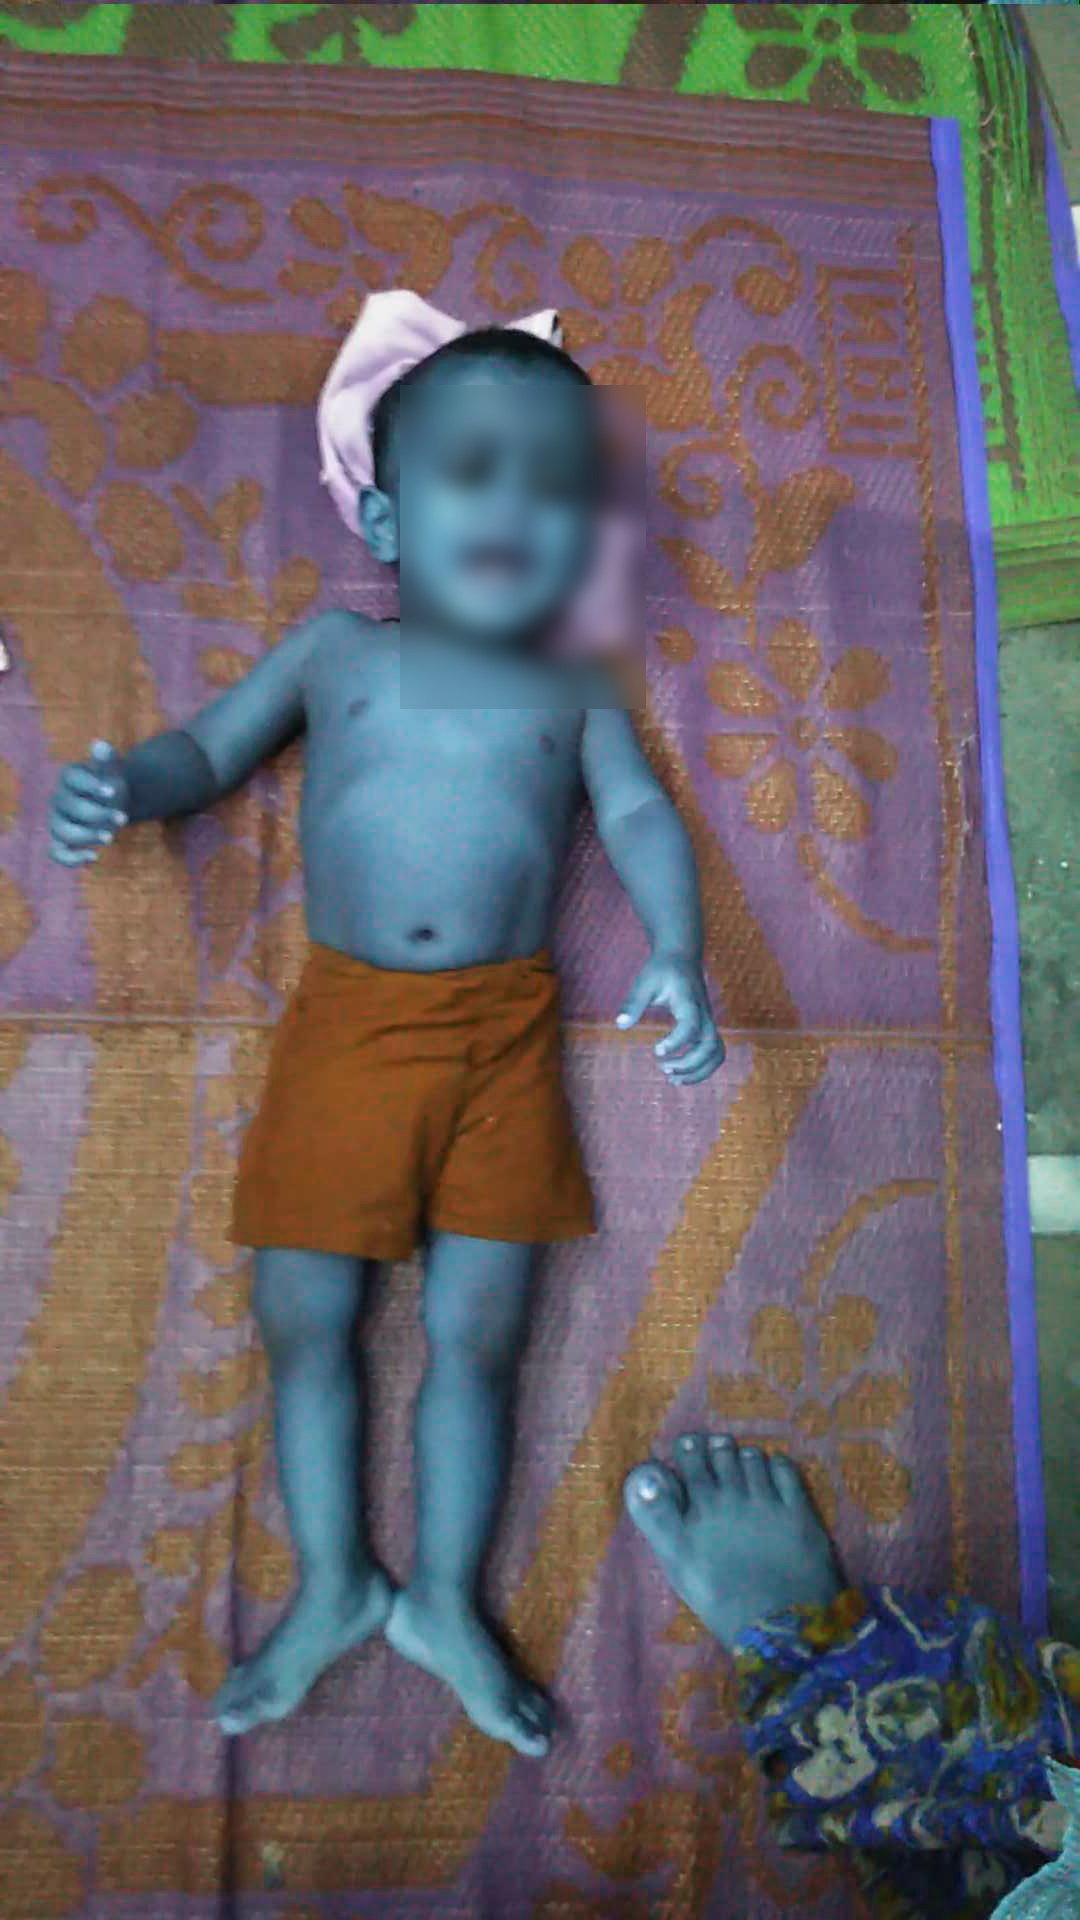

True


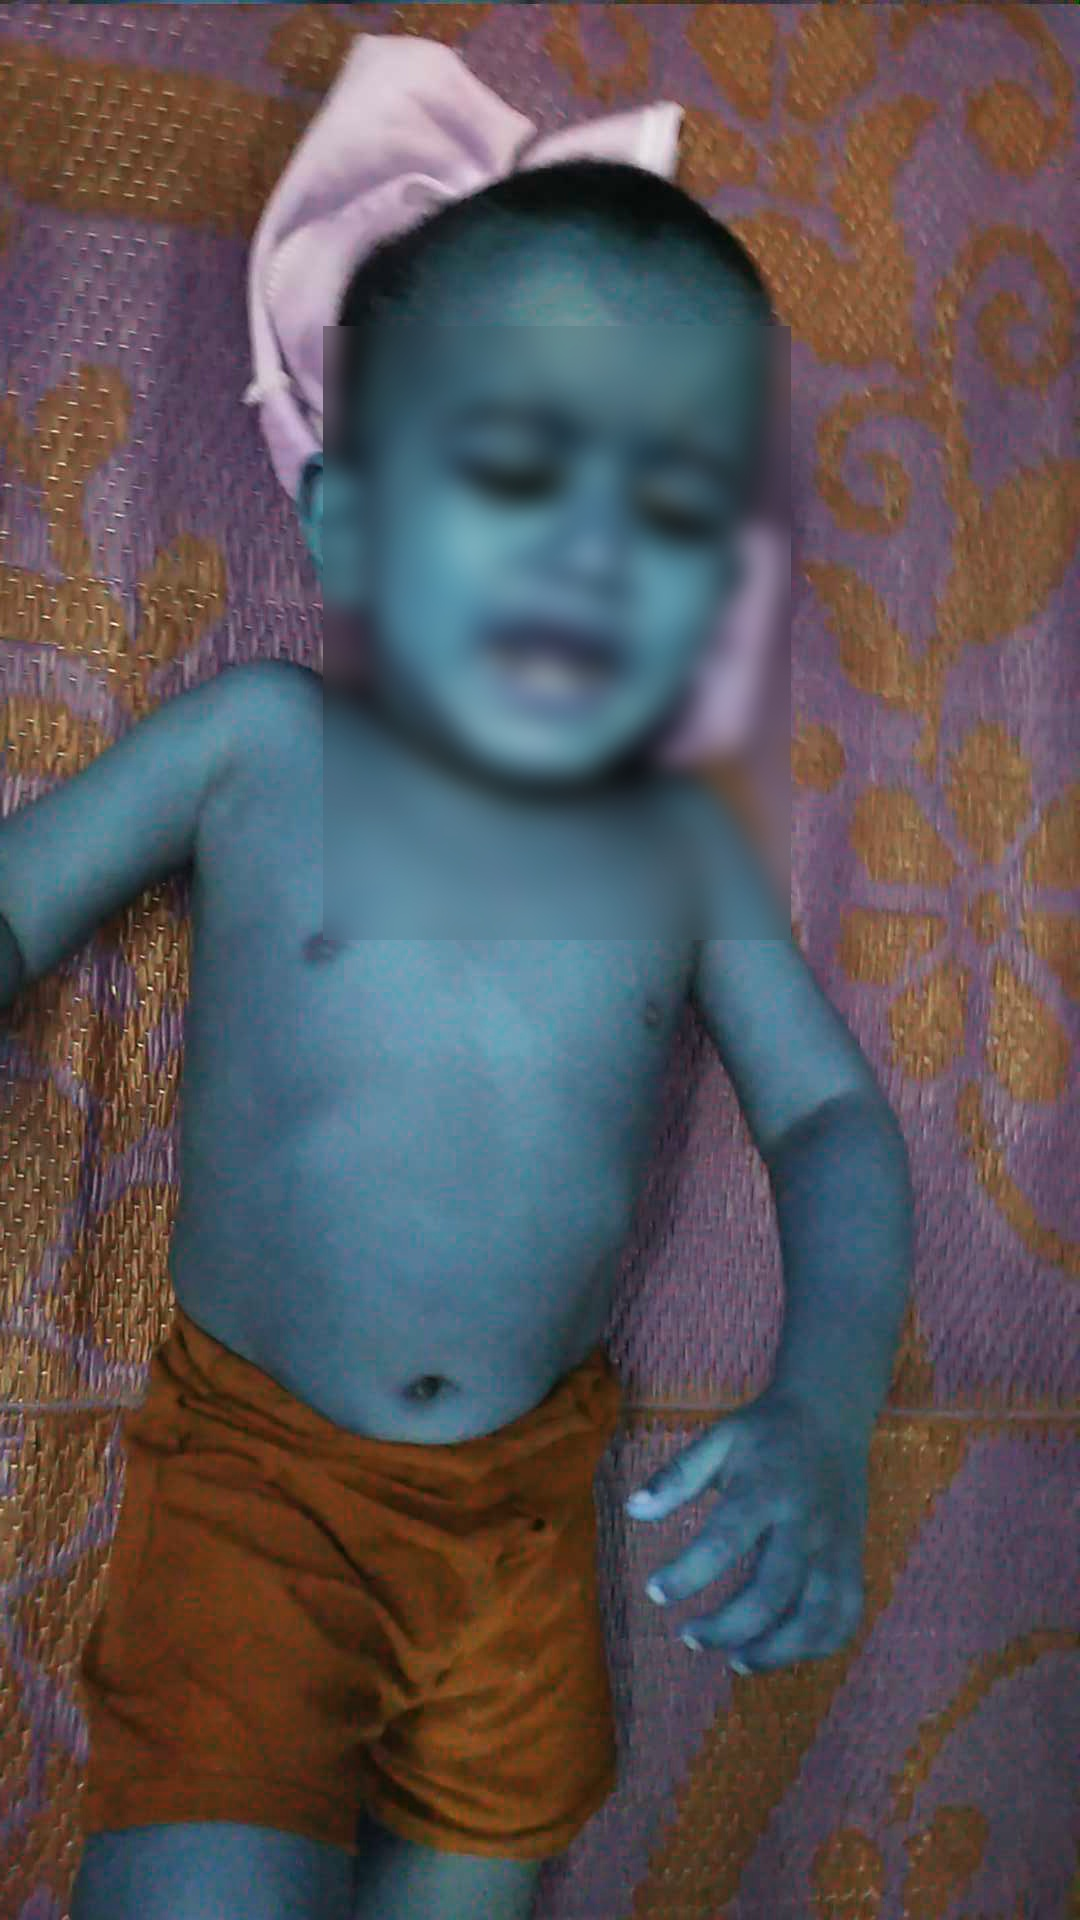

True


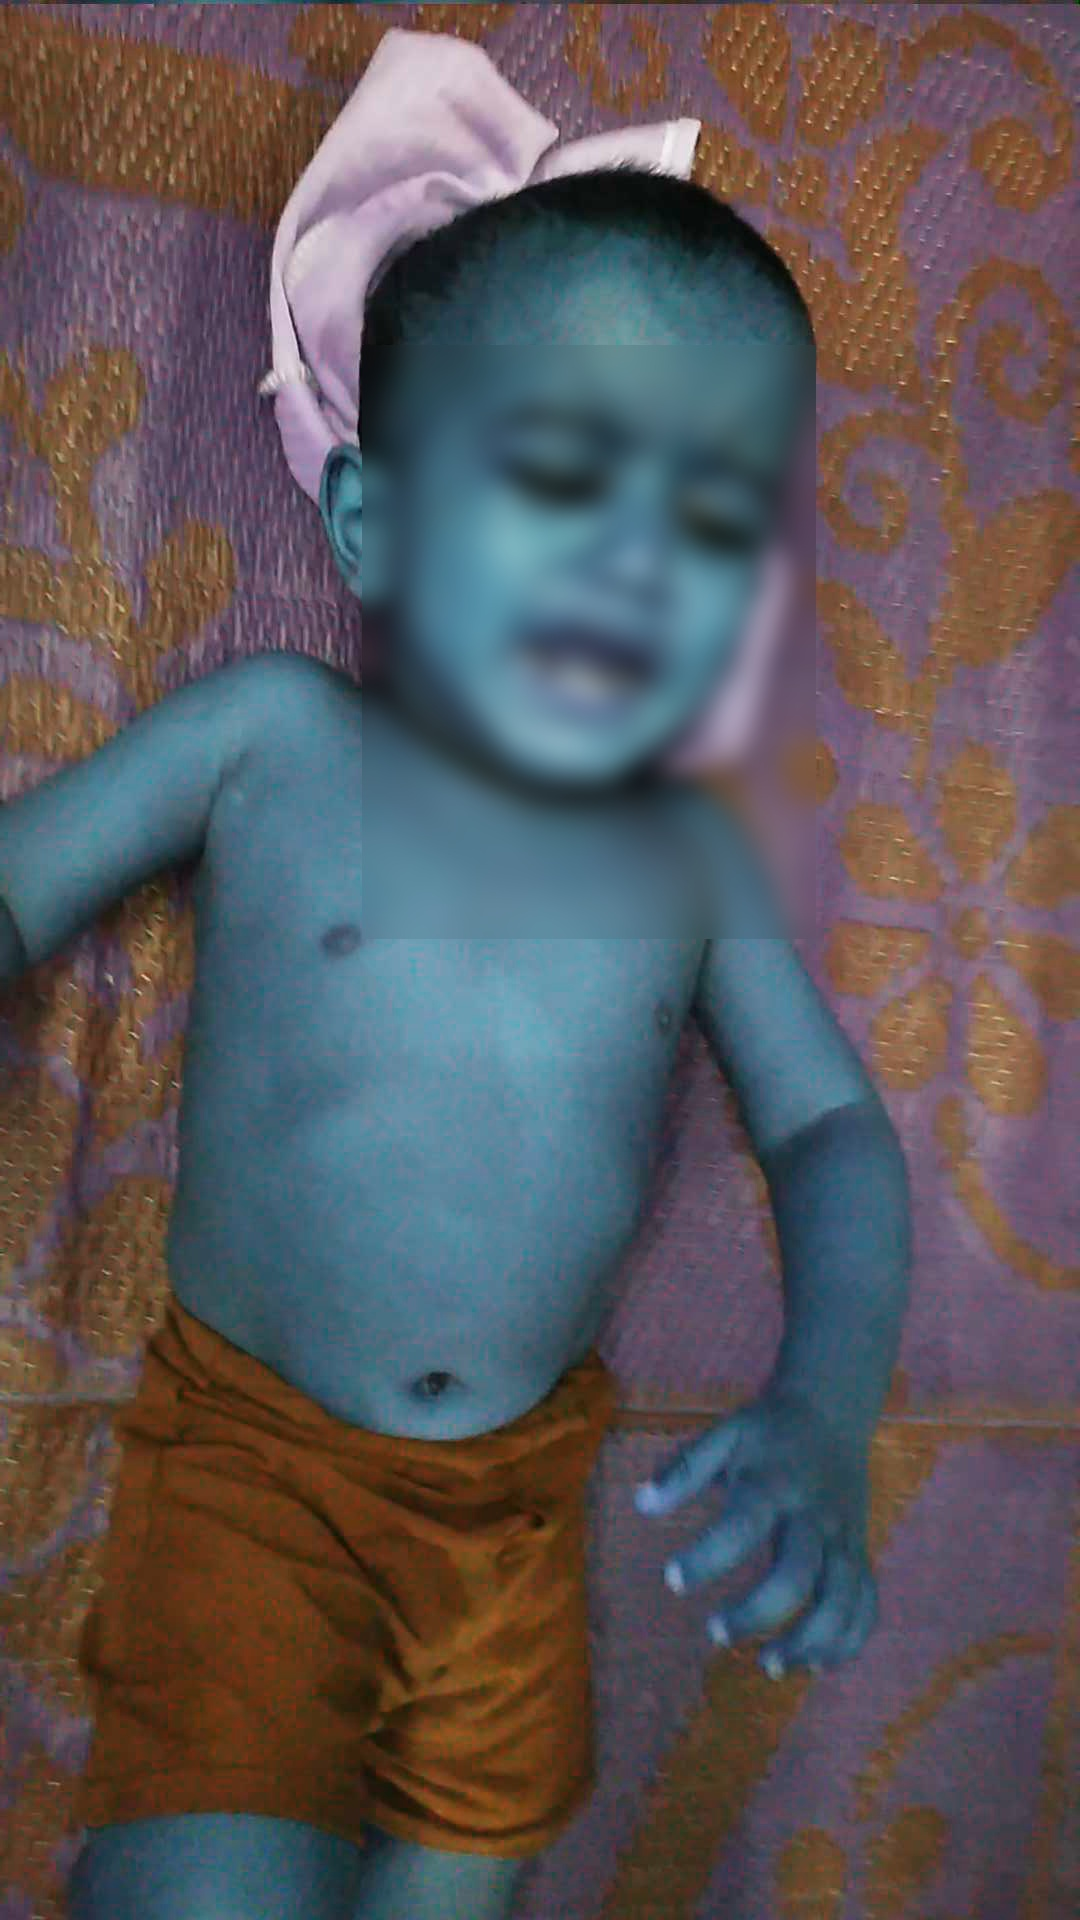

True


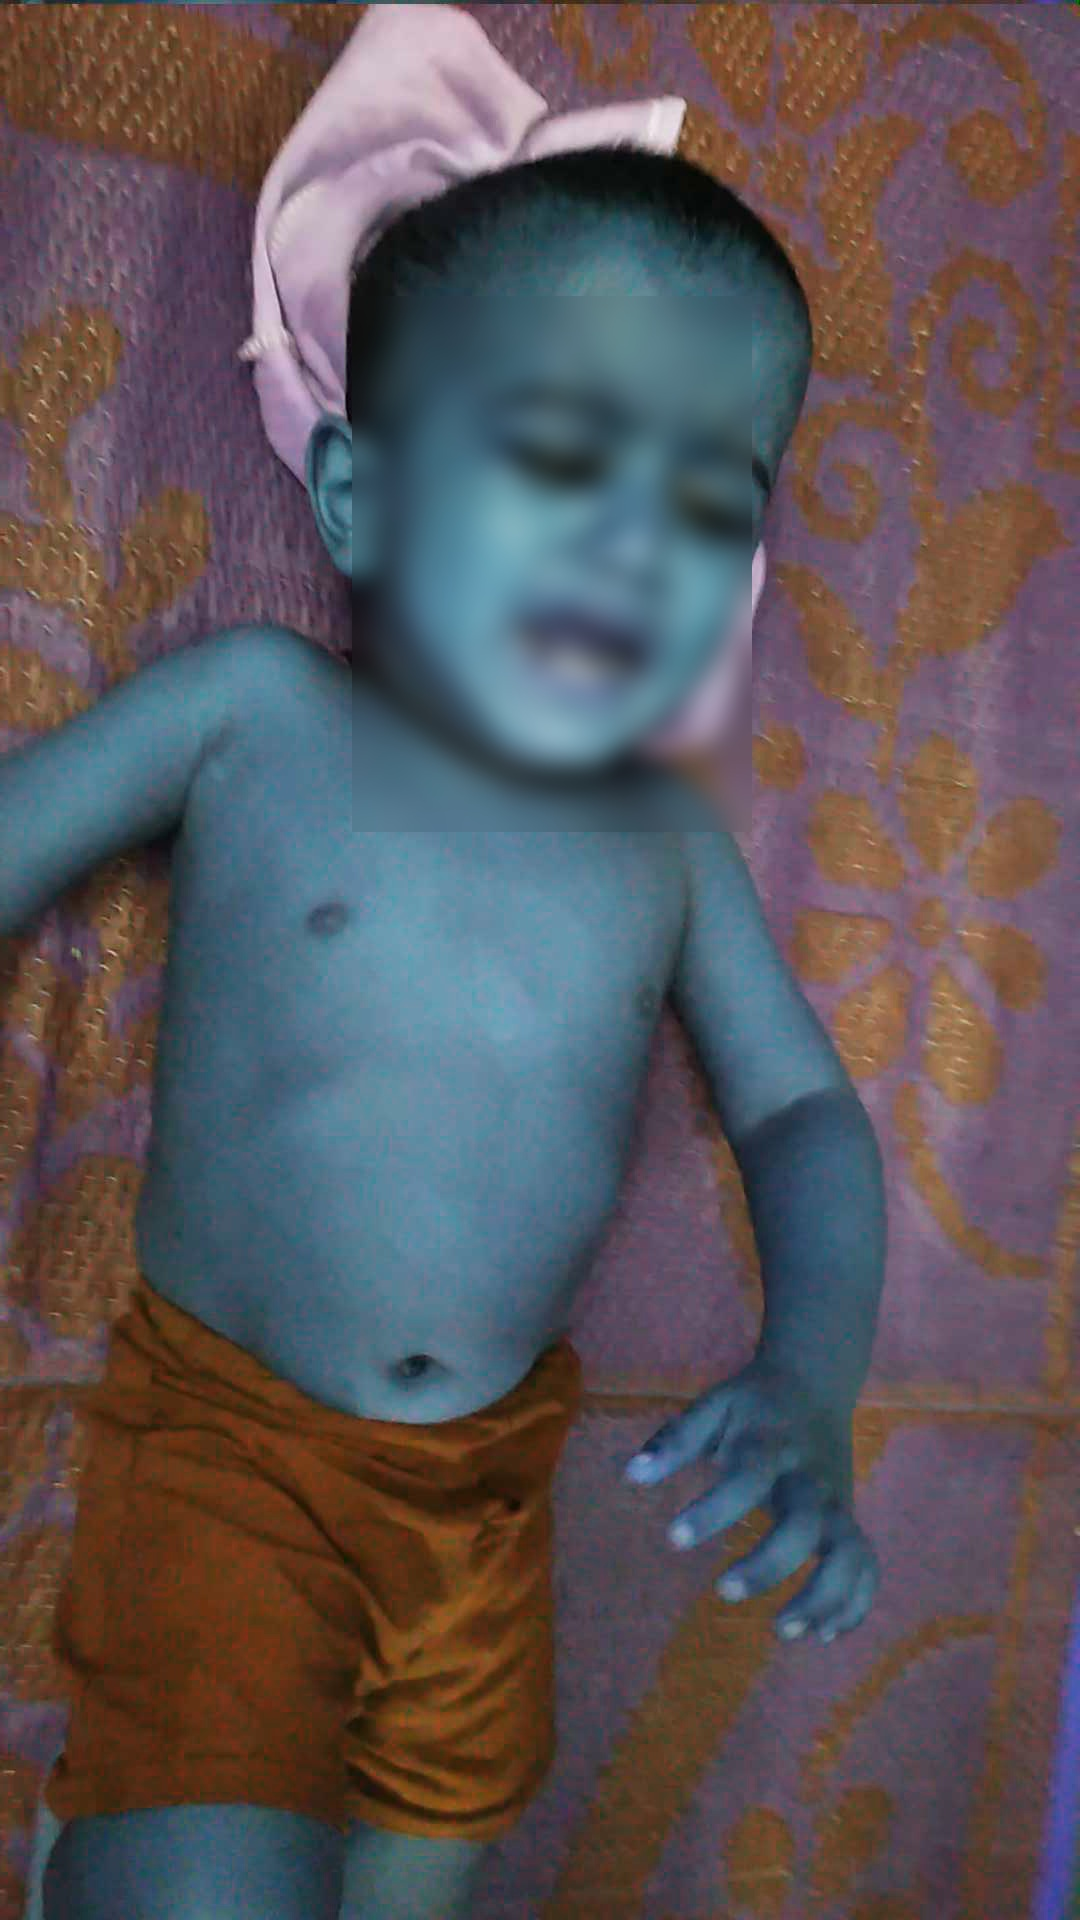

True


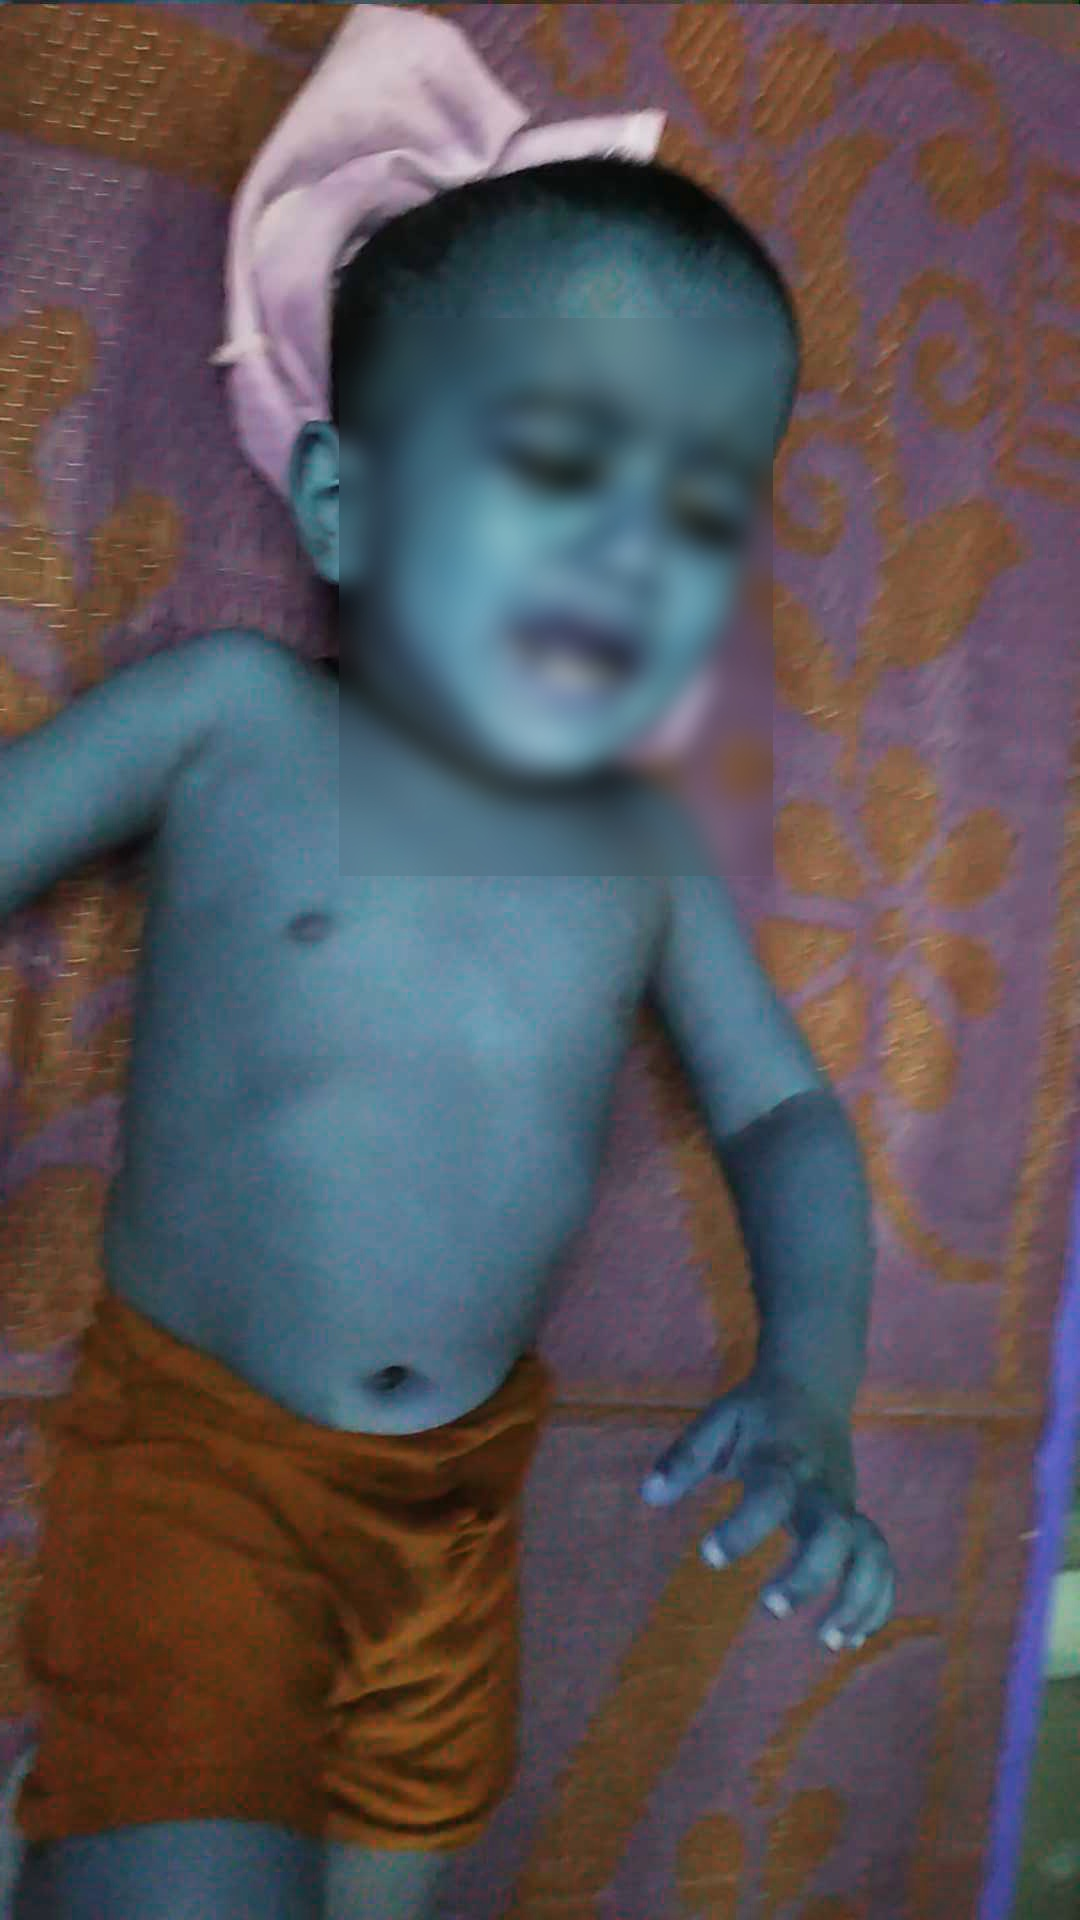

True


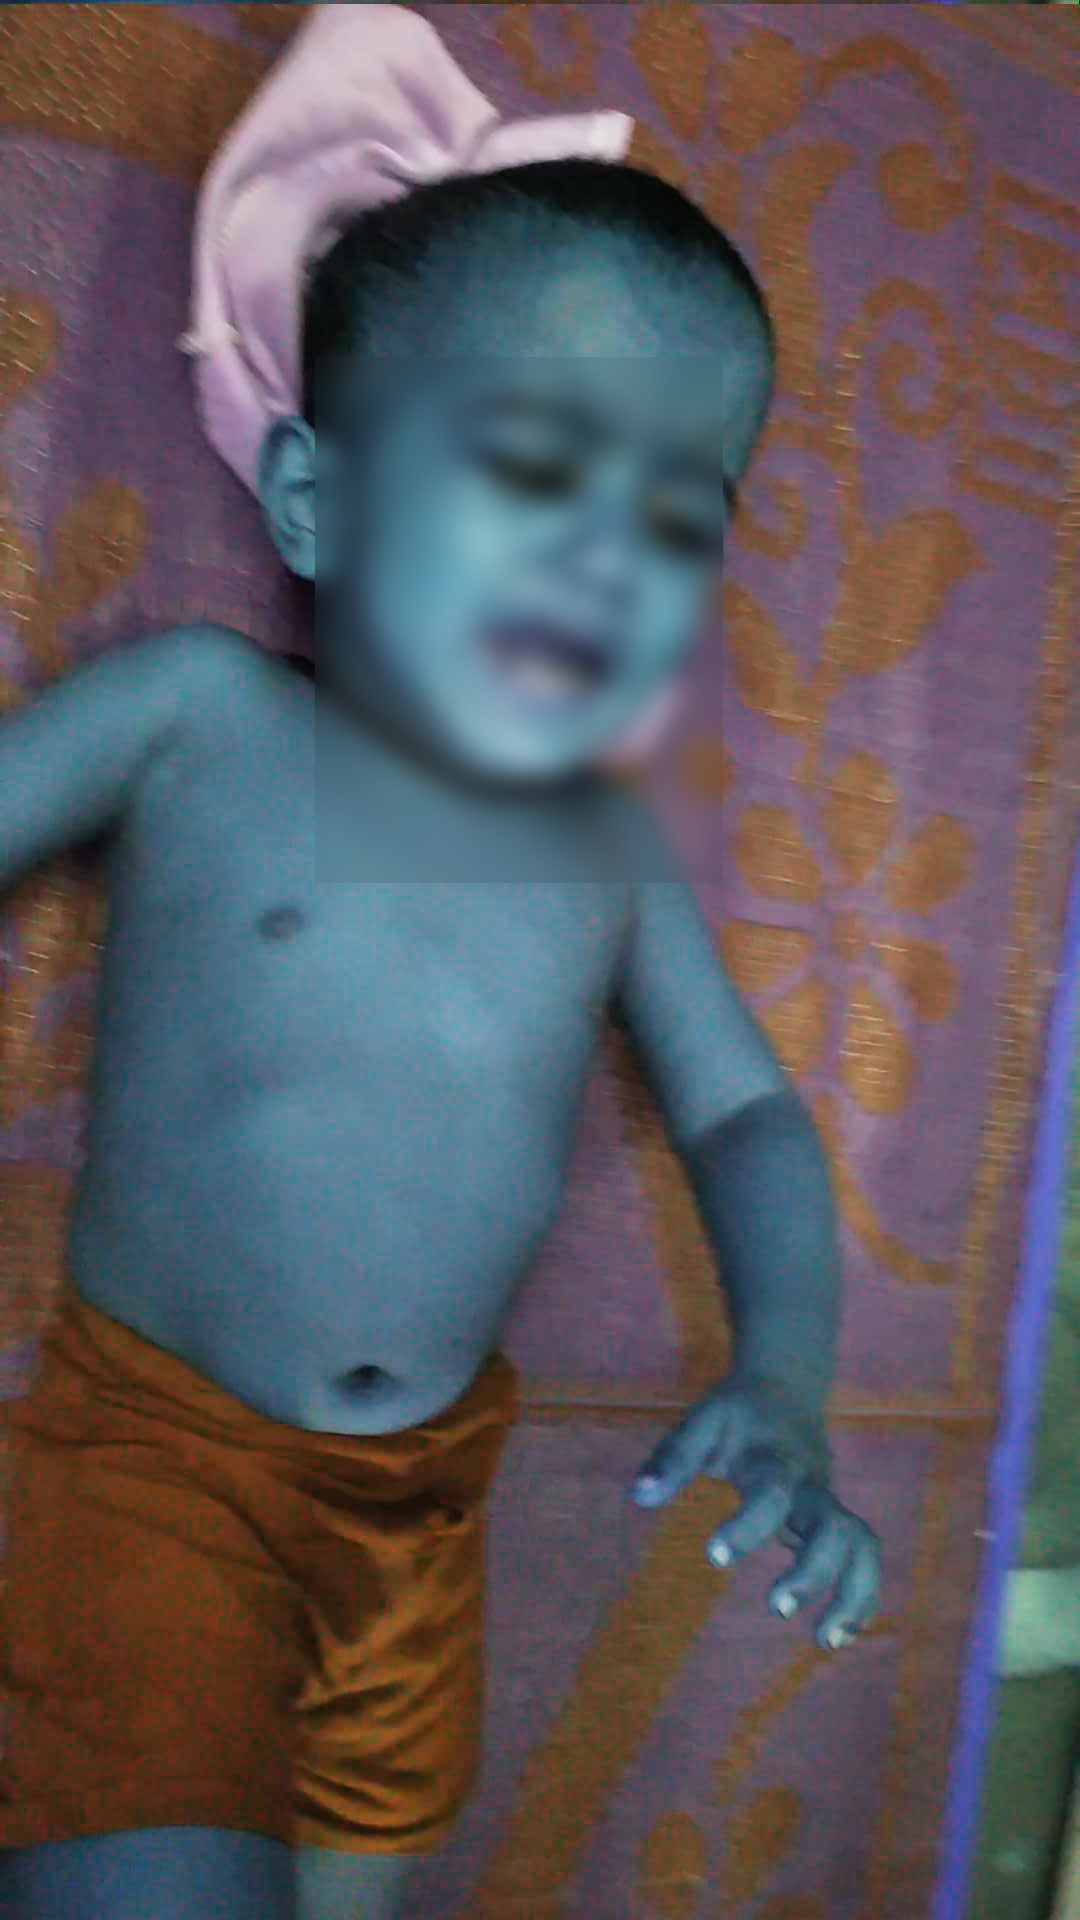

True


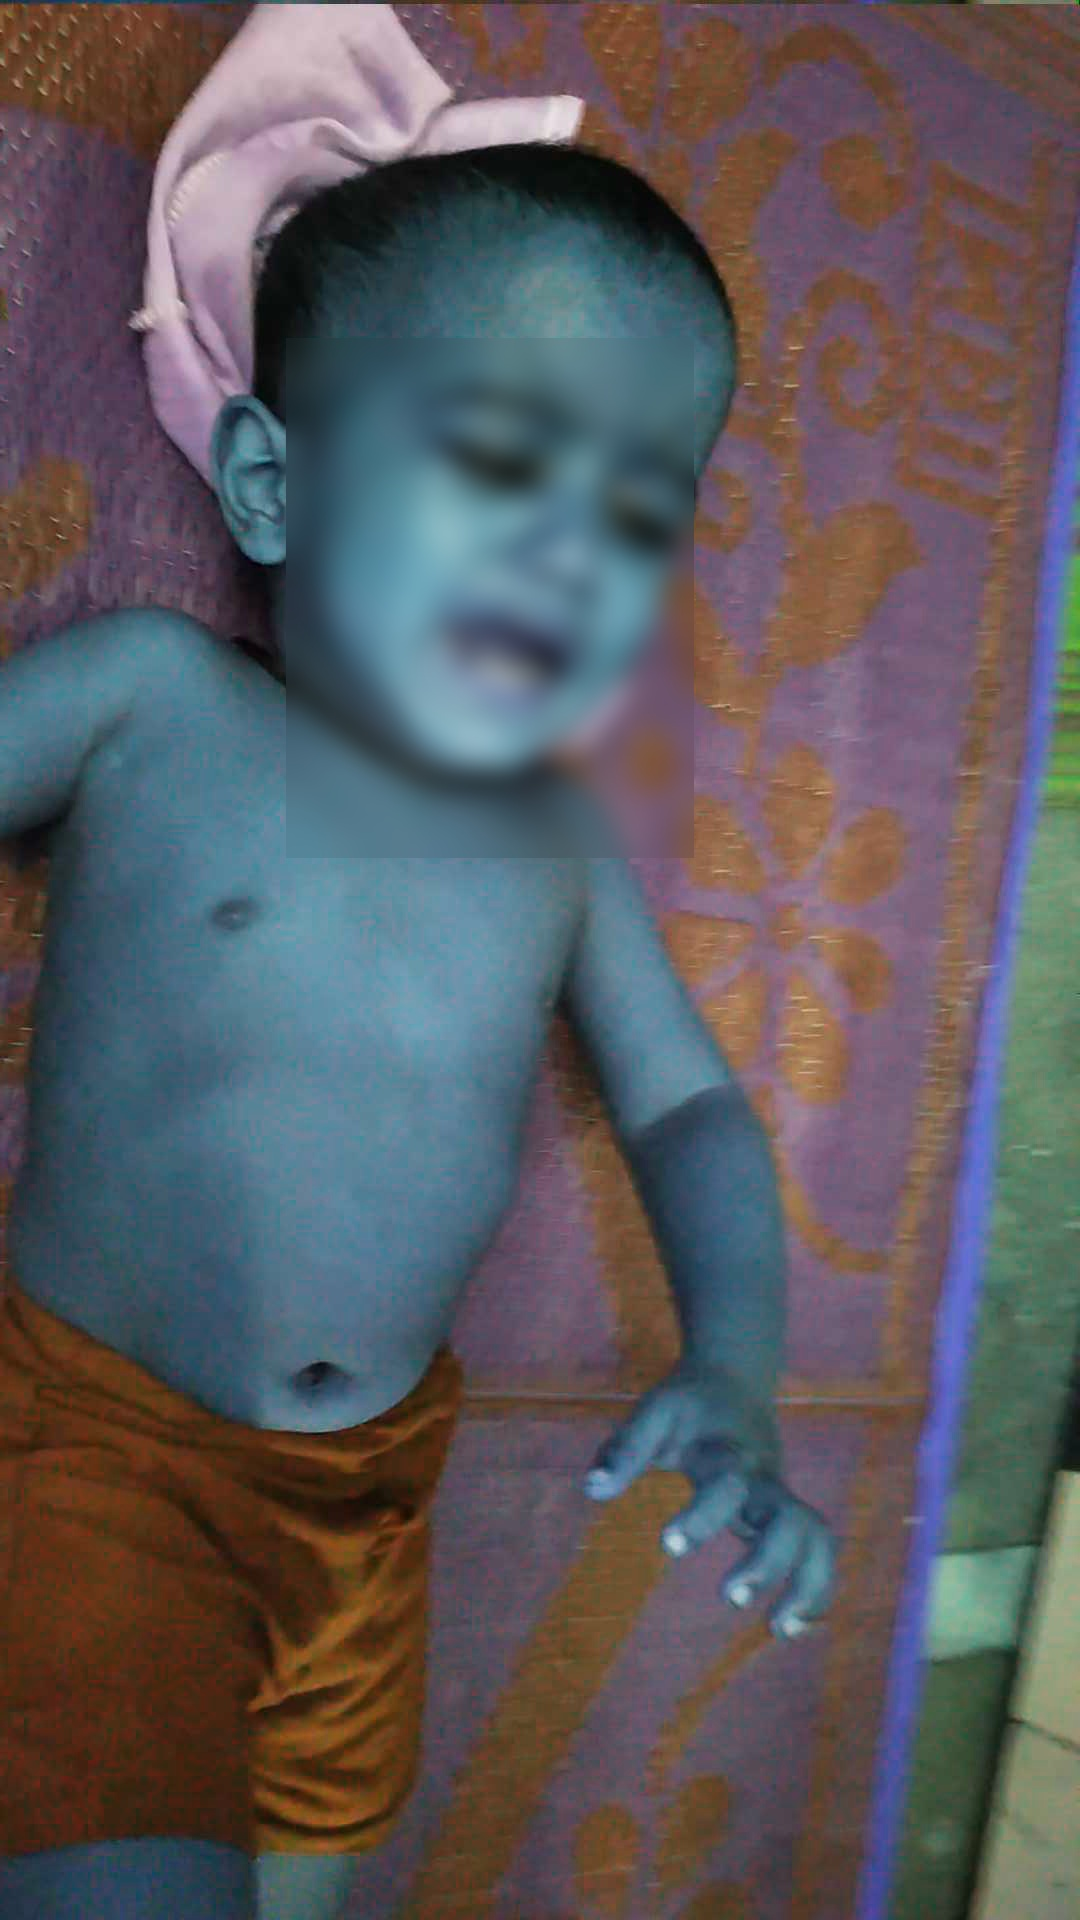

True


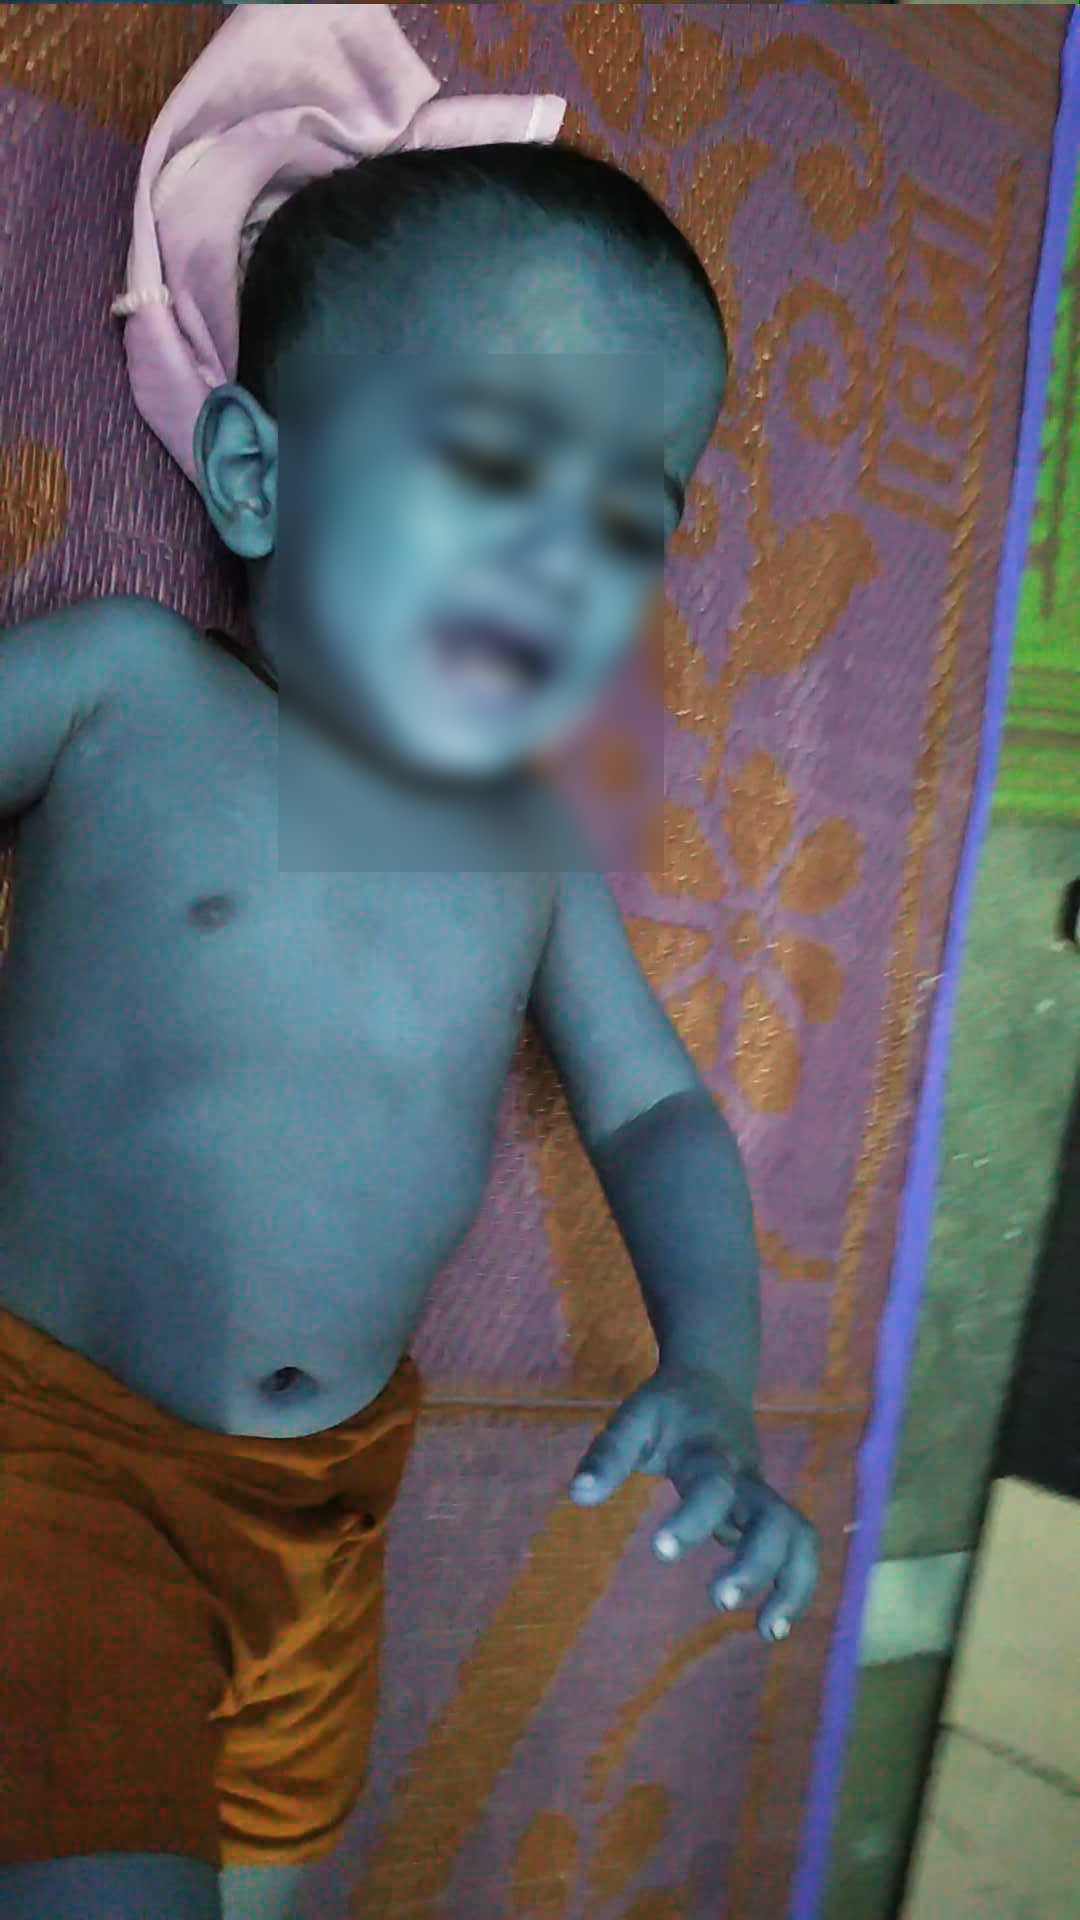

True


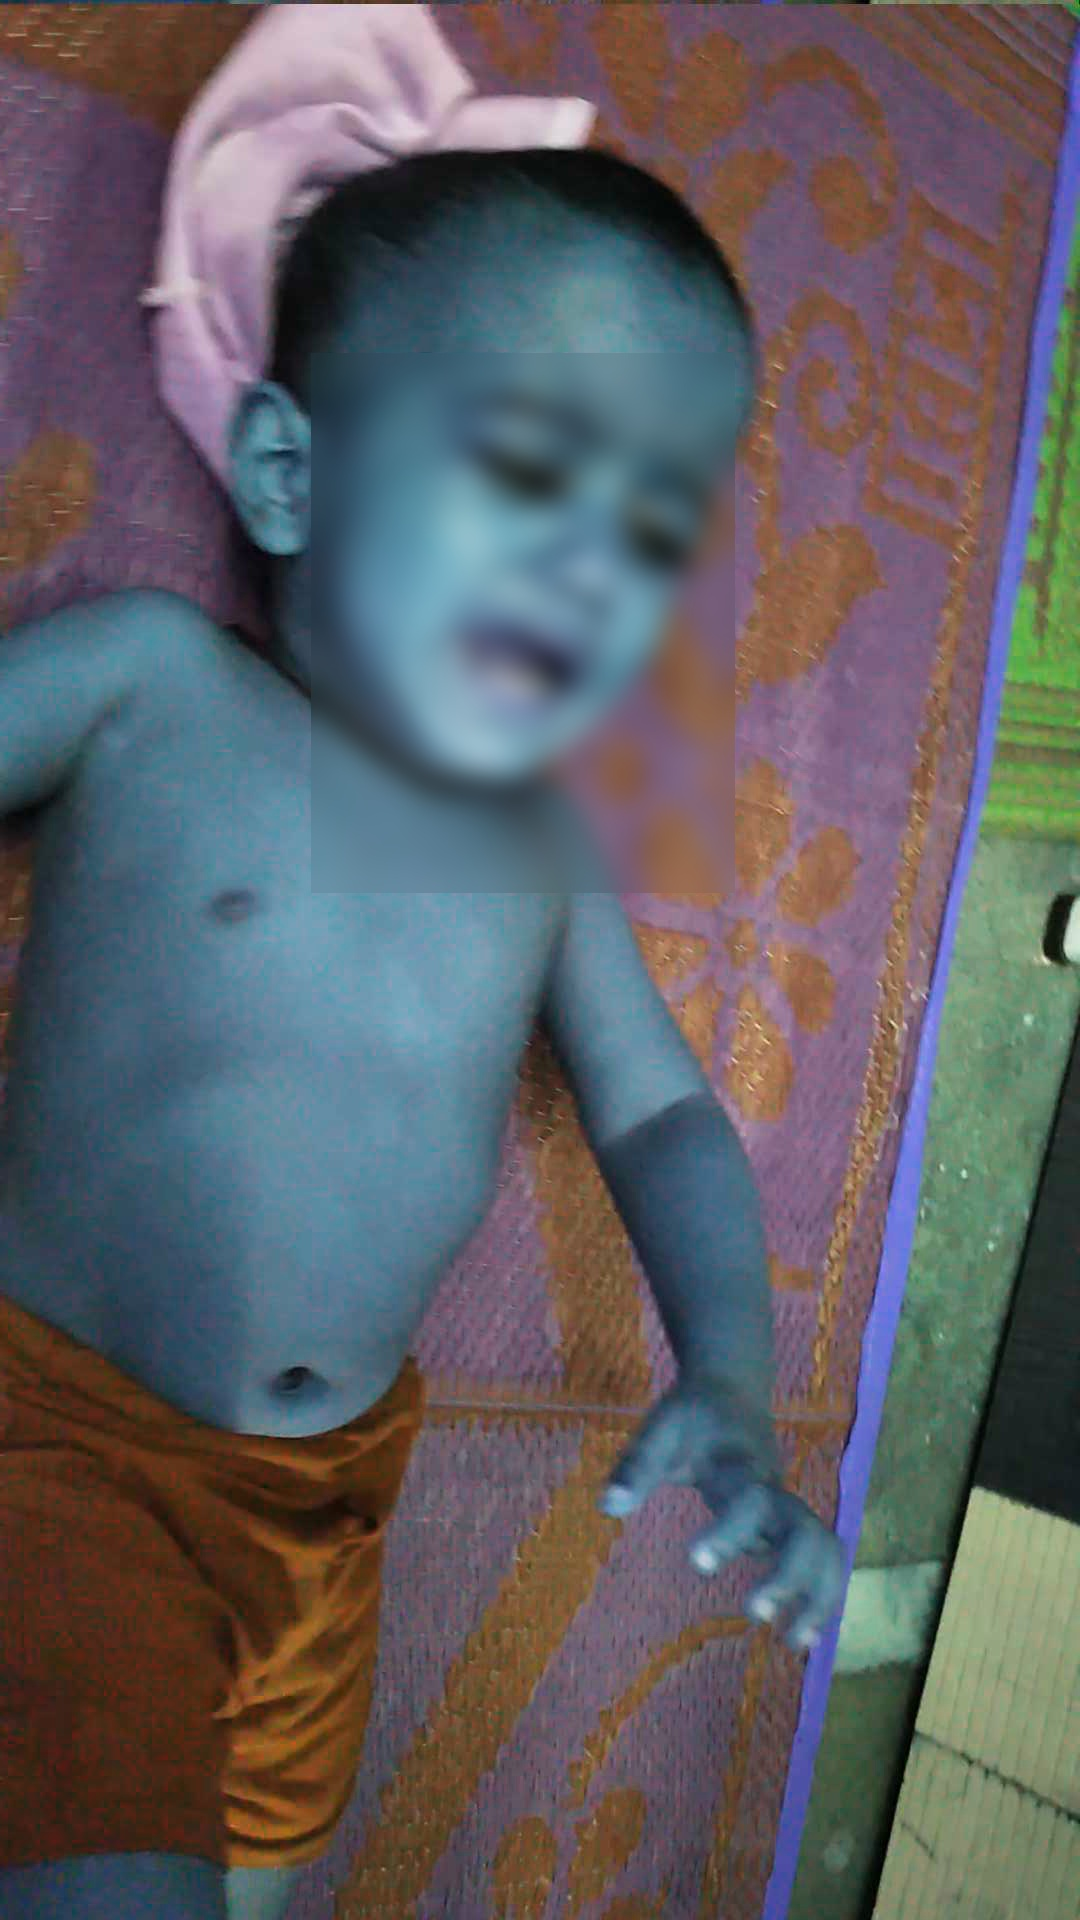

True


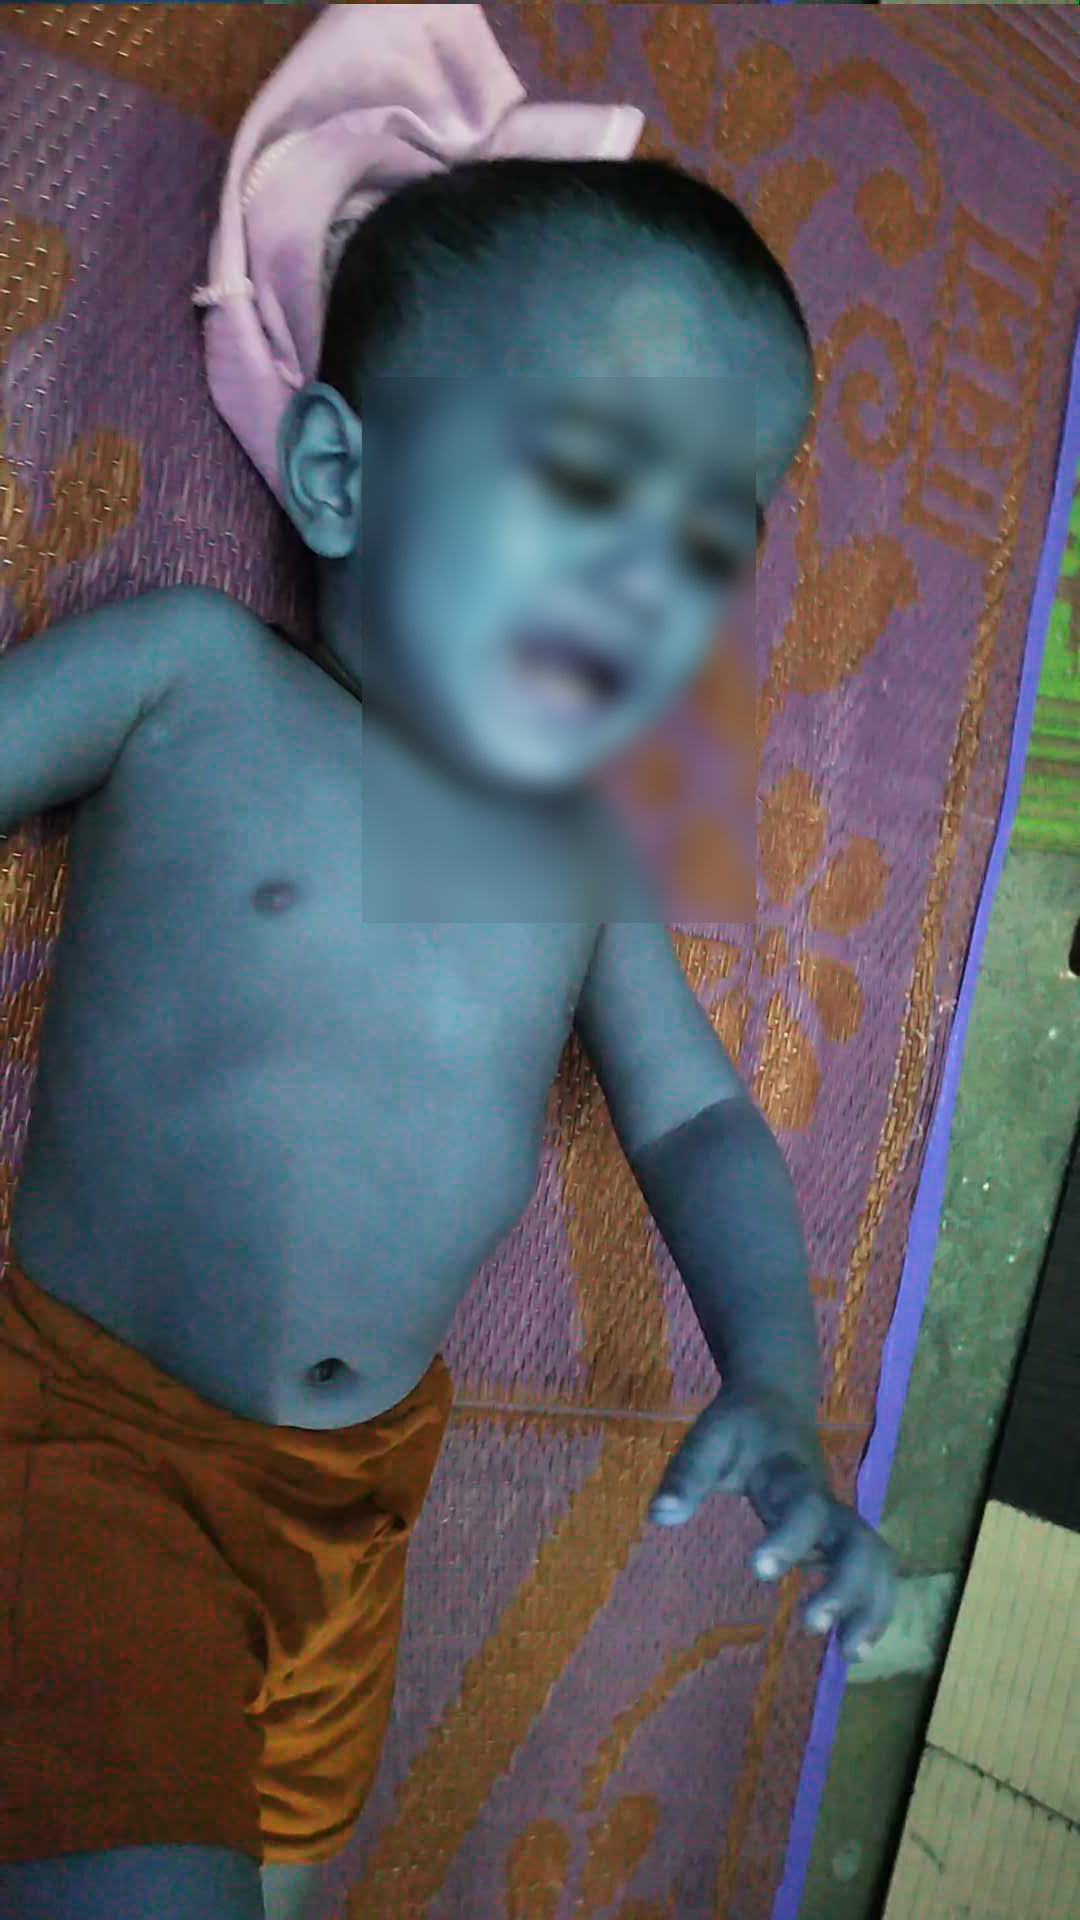

True


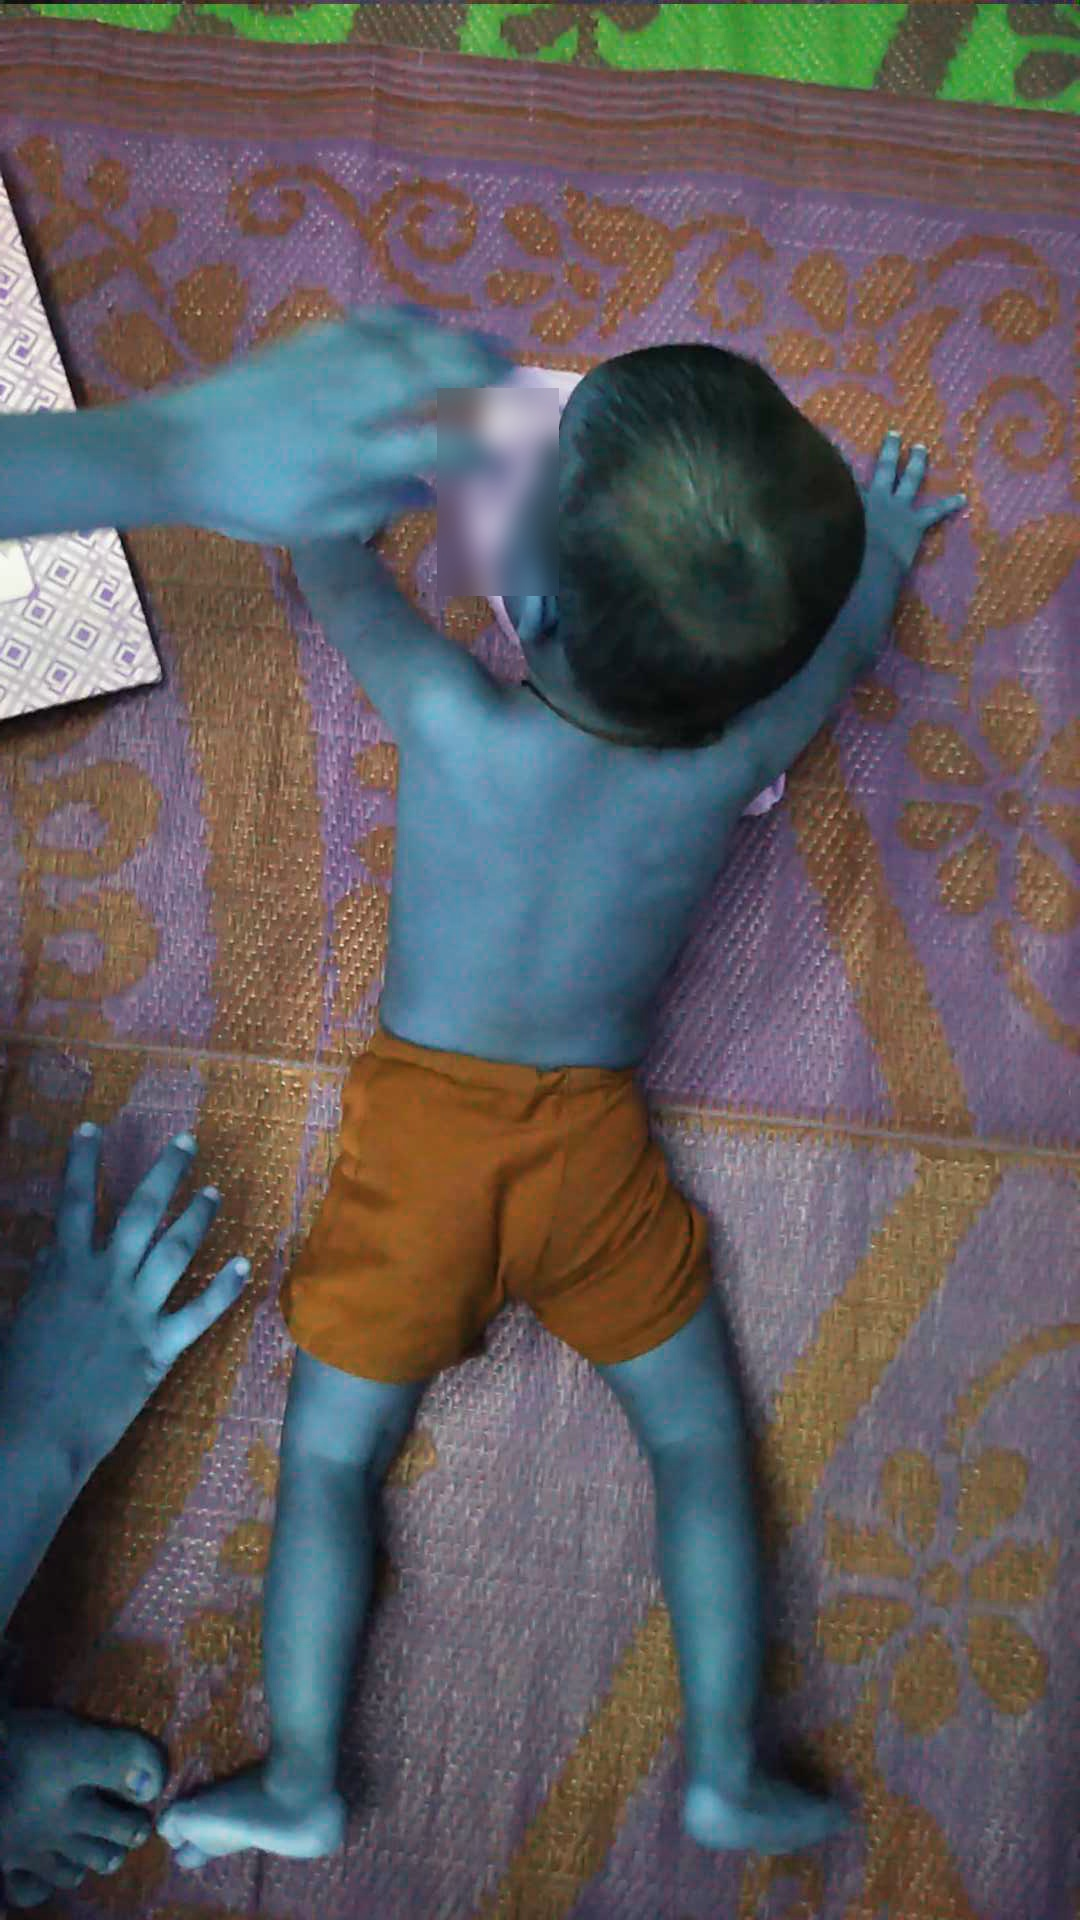

True


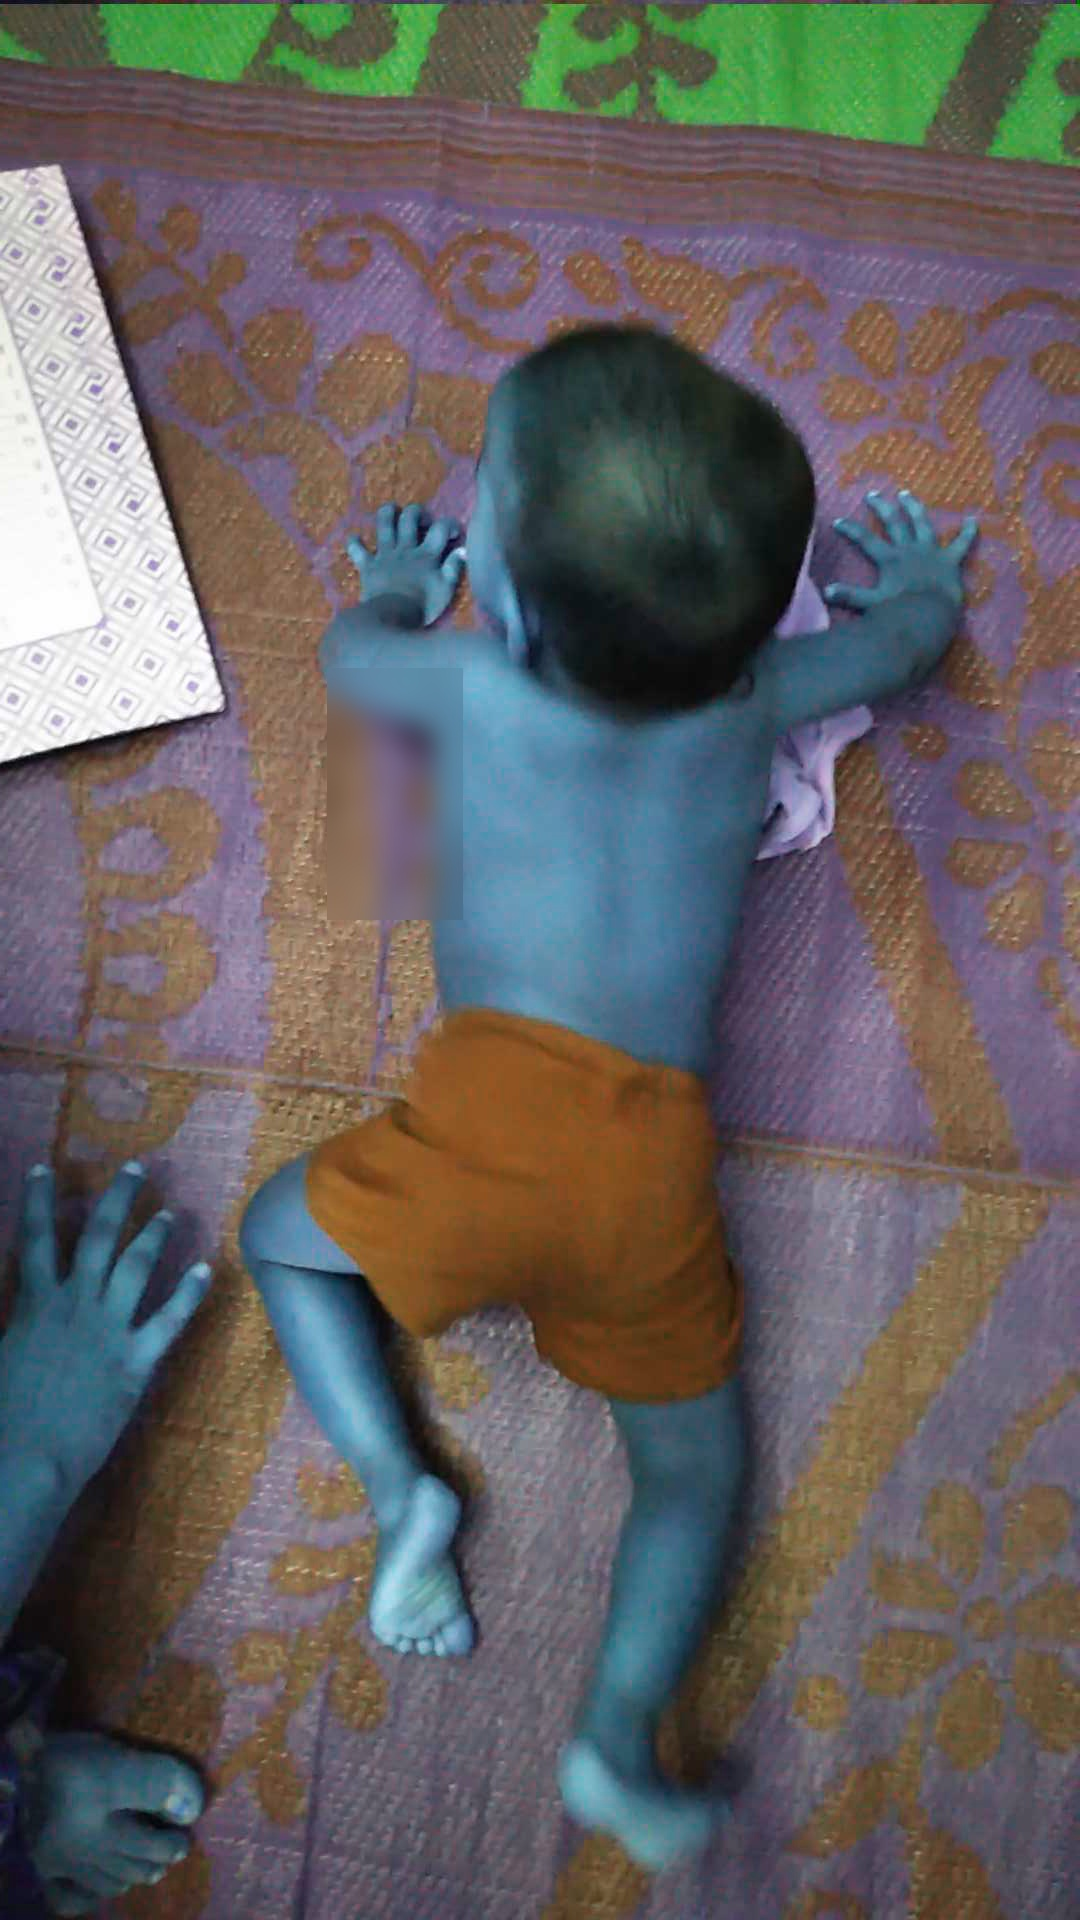

True


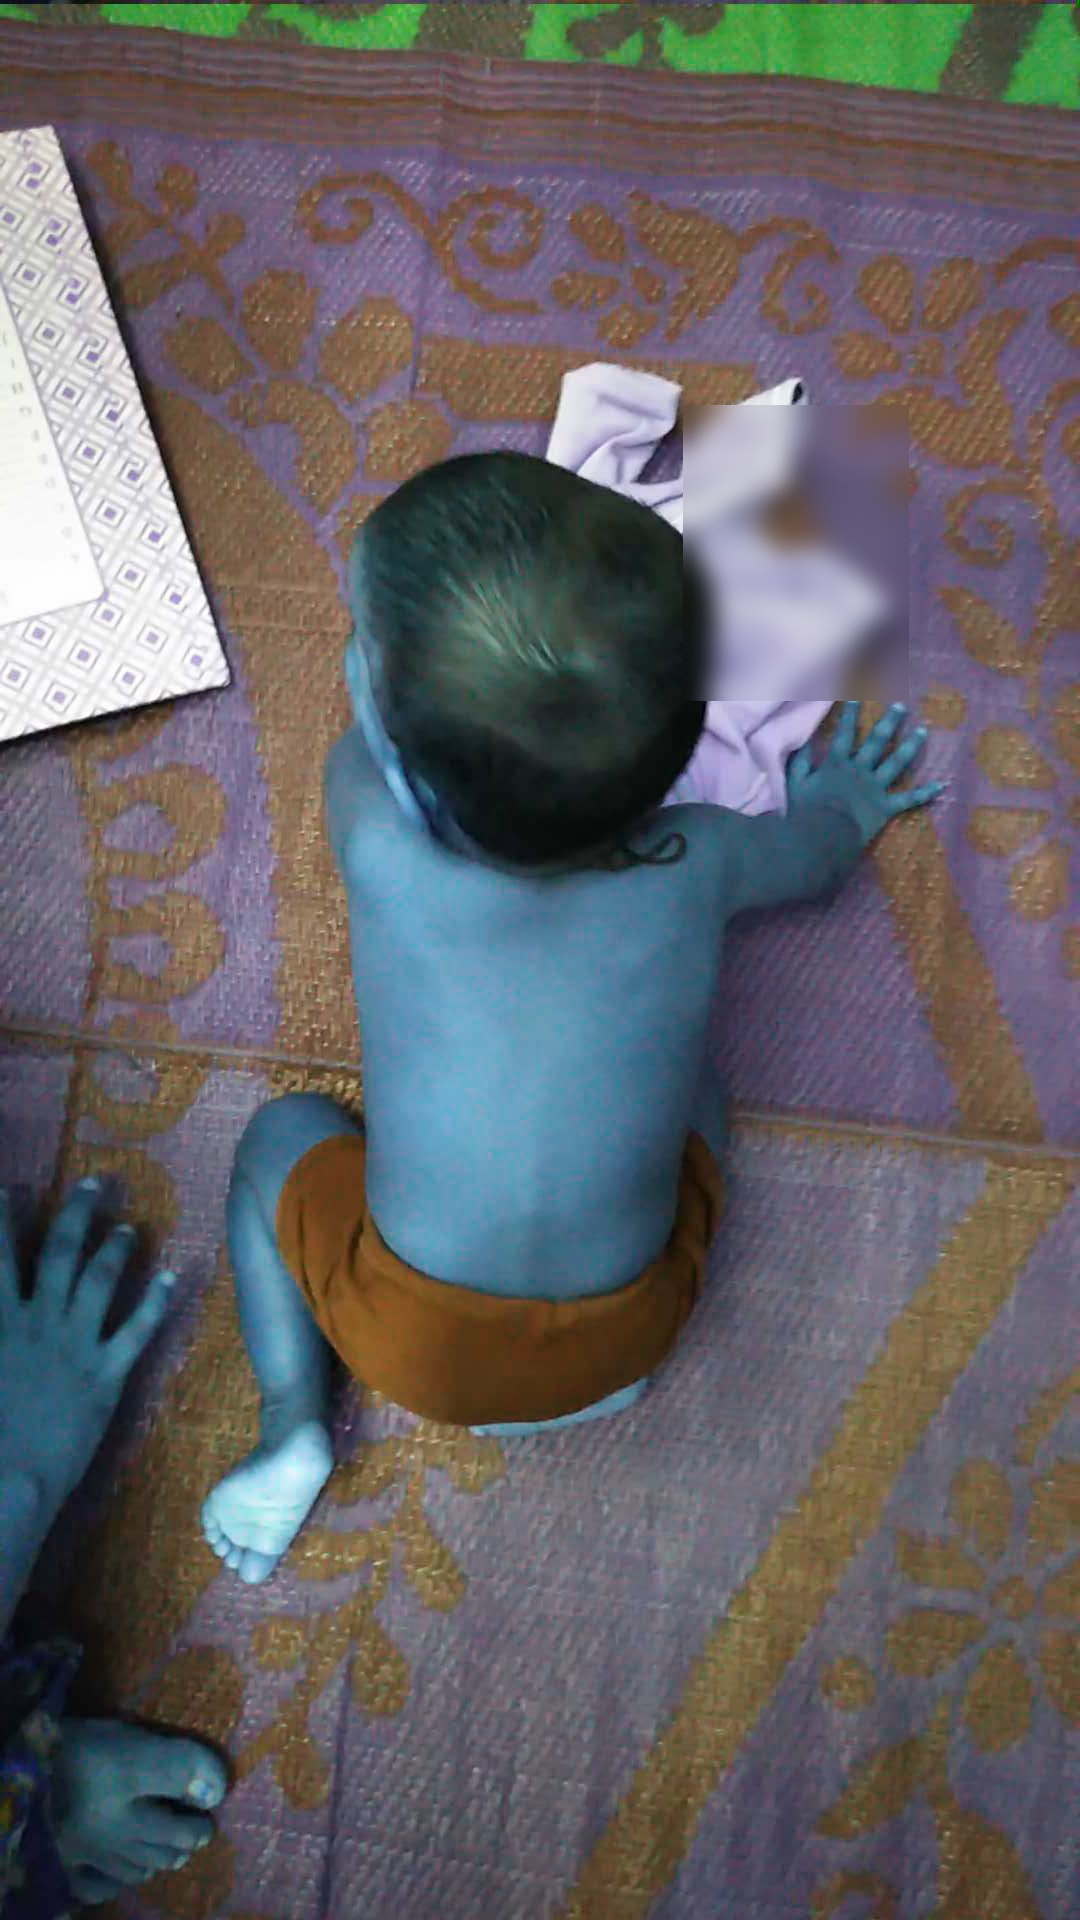

True
19


In [23]:
img_indexes = (range(0,len(jpg_paths)-1))
print(img_indexes)
images = []
count = 0
for index in img_indexes:
    images.append(jpg_paths[index])
for image in images:
    res_img,blurred,path,no_of_faces = blur_face(image)
    if blurred:
        count += 1
        imshow(res_img)
        res = cv2.imwrite('/whhdata/preprocessed/anon/'+str(datetime.now())+'.jpg',res_img) 
        print(res)
        #print('Output/sample_'+str(count))
print(count)        

In [ ]:
import dbutils.py
sql_statment = "INSERT INTO image_data no_of_faces VALUES {};".format(no_of_faces)


In [12]:
print(range(0,len(jpg_paths)-1))

range(0, 93)
